In [3]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns 
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objs as go

In [4]:
df = pd.read_csv('chinareci.csv')
print(df.shape)
df.head()

(246, 42)


number  group  age  gender  education  familyincome  offender  SAVRY1  \
0  5010005      1   16       1        4.0             1         4       1   
1  3010071      1   18       1        8.0             1         4       2   
2  2010042      1   17       1        7.0             1         5       3   
3  3010047      1   17       1        5.0             1         4       3   
4  2010025      1   17       1        8.0             1         5       3   

   SAVRY2  SAVRY3  ...  SAVRY24    I  P1  P2  P3  P4  P5  P6  P  Reoffending  
0       2       2  ...        3  1.0   2   2   2   1   2   2  5            0  
1       1       1  ...        1  NaN   2   2   2   1   2   1  4            0  
2       2       2  ...        3  NaN   2   2   1   1   2   1  3            0  
3       2       3  ...        2  0.0   1   2   1   1   1   2  2            0  
4       1       1  ...        1  0.0   1   2   1   1   2   2  3            0  

[5 rows x 42 columns]

# ***Data Overview***

In [5]:
!pip install ydata-profiling

In [6]:
from ydata_profiling import ProfileReport

In [7]:
!pip install scikit-plot

In [8]:
 df.drop(['number', 'group','gender','H','S','I','P'], axis=1, inplace=True)

In [9]:
report = ProfileReport(df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
print(df.shape)

(246, 35)


# Data Preprocessing

In [11]:
# Summary Statistics for Numerical data:
df.describe()

age   education  familyincome    offender      SAVRY1  \
count  246.000000  245.000000    246.000000  246.000000  246.000000   
mean    16.764228    7.318367      2.585366    3.540650    2.560976   
std      0.982137    1.841203      0.951277    1.104894    0.665737   
min     14.000000    1.000000      0.000000    1.000000    1.000000   
25%     16.000000    7.000000      2.000000    3.000000    2.000000   
50%     17.000000    8.000000      2.500000    4.000000    3.000000   
75%     17.000000    9.000000      3.000000    4.000000    3.000000   
max     18.000000   11.000000      5.000000    5.000000    3.000000   

           SAVRY2      SAVRY3      SAVRY4      SAVRY5      SAVRY6  ...  \
count  246.000000  246.000000  246.000000  246.000000  246.000000  ...   
mean     1.922764    1.995935    1.682927    1.138211    1.686992  ...   
std      0.846439    0.785054    0.780550    0.400514    0.666696  ...   
min      1.000000    1.000000    1.000000    1.000000    1.000000  ...   
25%      1.000000    1.000000    1.000000    1.000000    1.000000  ...   
50%      2.000000    2.000000    1.000000    1.000000    2.000000  ...   
75%      3.000000    3.000000    2.000000    1.000000    2.000000  ...   
max      3.000000    3.000000    3.000000    3.000000    3.000000  ...   

          SAVRY22     SAVRY23     SAVRY24          P1          P2          P3  \
count  246.000000  246.000000  246.000000  246.000000  246.000000  246.000000   
mean     1.577236    1.930894    2.329268    1.345528    1.577236    1.430894   
std      0.664040    0.744573    0.783319    0.476510    0.495006    0.496211   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      1.000000    1.000000    2.000000    1.000000    1.000000    1.000000   
50%      1.000000    2.000000    3.000000    1.000000    2.000000    1.000000   
75%      2.000000    2.000000    3.000000    2.000000    2.000000    2.000000   
max      3.000000    3.000000    3.000000    2.000000    2.000000    2.000000   

               P4          P5          P6  Reoffending  
count  246.000000  246.000000  246.000000   246.000000  
mean     1.491870    1.731707    1.369919     0.256098  
std      0.500953    0.443974    0.483767     0.437366  
min      1.000000    1.000000    1.000000     0.000000  
25%      1.000000    1.000000    1.000000     0.000000  
50%      1.000000    2.000000    1.000000     0.000000  
75%      2.000000    2.000000    2.000000     1.000000  
max      2.000000    2.000000    2.000000     1.000000  

[8 rows x 35 columns]

In [12]:
# use isnull().sum() to check for missing values 
df.isnull().sum() 

age             0
education       1
familyincome    0
offender        0
SAVRY1          0
SAVRY2          0
SAVRY3          0
SAVRY4          0
SAVRY5          0
SAVRY6          0
SAVRY7          0
SAVRY8          0
SAVRY9          0
SAVRY10         0
SAVRY11         0
SAVRY12         0
SAVRY13         0
SAVRY14         0
SAVRY15         0
SAVRY16         0
SAVRY17         0
SAVRY18         0
SAVRY19         0
SAVRY20         0
SAVRY21         0
SAVRY22         0
SAVRY23         0
SAVRY24         0
P1              0
P2              0
P3              0
P4              0
P5              0
P6              0
Reoffending     0
dtype: int64

In [13]:
df["education"] = df["education"].fillna(method='ffill')

In [14]:
df.isnull().sum() 

age             0
education       0
familyincome    0
offender        0
SAVRY1          0
SAVRY2          0
SAVRY3          0
SAVRY4          0
SAVRY5          0
SAVRY6          0
SAVRY7          0
SAVRY8          0
SAVRY9          0
SAVRY10         0
SAVRY11         0
SAVRY12         0
SAVRY13         0
SAVRY14         0
SAVRY15         0
SAVRY16         0
SAVRY17         0
SAVRY18         0
SAVRY19         0
SAVRY20         0
SAVRY21         0
SAVRY22         0
SAVRY23         0
SAVRY24         0
P1              0
P2              0
P3              0
P4              0
P5              0
P6              0
Reoffending     0
dtype: int64

In [15]:
df["age"].value_counts()

17    104
16     58
18     58
15     20
14      6
Name: age, dtype: int64

In [16]:
# Separate the independent (X) and dependent (y) features
X = df.drop(columns = 'Reoffending')
y = df['Reoffending']

# Random Oversampling

In [17]:
! pip install -U imbalanced-learn

<AxesSubplot:ylabel='Reoffending'>

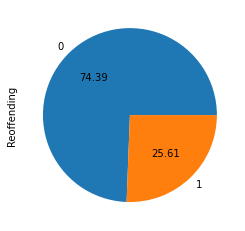

In [18]:
# Show pie plot (Approach 1)
y.value_counts().plot.pie(autopct='%.2f')

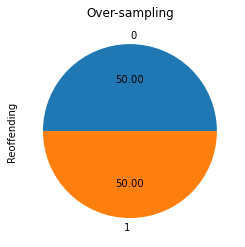

In [19]:
from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res, y_res = ros.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [20]:
y_res.value_counts()

0    183
1    183
Name: Reoffending, dtype: int64

# feature selection before split

# fisher score chi2 test

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

# Create a SelectKBest object with chi-squared scoring function
k_best = SelectKBest(score_func=chi2, k=20)  # Select top 20 features

# Apply feature selection to the data
X_selected= k_best.fit_transform(X_res, y_res)

# Get the selected feature indices
selected_features_indices = k_best.get_support(indices=True)

# Get the selected feature names
selected_feature_names = X_res.columns[selected_features_indices]

# Print the selected feature names
print("Selected Features:")
for feature in selected_feature_names:
    print(feature)

# Univariate Statistical Tests

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif  # For classification tasks
from sklearn.feature_selection import f_regression  # For regression tasks

# Assuming you have feature data 'X' and target data 'y'

# Instantiate the SelectKBest object with the desired statistical test and select the top k features
k = 20  # Number of features to select
selector = SelectKBest(score_func=f_classif, k=k)  # For classification tasks, use f_classif. For regression tasks, use f_regression.

# Apply feature selection on the data
X_selected = selector.fit_transform(X_res, y_res)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]

# Print the selected feature names
print("Selected features:", selected_features)

# recursive feature elimination

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Assuming you have feature data 'X' and target data 'y'

# Create a base model for RFE
model = LogisticRegression()

# Specify the number of desired features
n_features = 20

# Perform RFE to select the top features
rfe = RFE(estimator=model, n_features_to_select=n_features)
X_selected = rfe.fit_transform(X_res, y_res)


# Train - Test Split (Over Sampling)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_oversampling, X_test_oversampling, y_train_oversampling, y_test_oversampling = train_test_split(X_selected, y_res, test_size = 0.2, random_state = 20)

In [21]:
from sklearn.model_selection import train_test_split
X_train_oversampling, X_test_oversampling, y_train_oversampling, y_test_oversampling = train_test_split(X_res, y_res, test_size = 0.2, random_state = 20)

# Normalization (Min-Max Scaling)

In [22]:
from sklearn.preprocessing import MinMaxScaler
# Initialize the MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_oversampling)
X_train_scaled_oversampling = scaler.transform(X_train_oversampling)
X_test_scaled_oversampling = scaler.transform(X_test_oversampling)

In [23]:
X_train_oversampling=pd.DataFrame(X_train_oversampling)
X_test_oversampling=pd.DataFrame(X_test_oversampling)

In [24]:
X_train_scaled_oversampling = pd.DataFrame(X_train_scaled_oversampling, columns=X_train_oversampling.columns)
X_test_scaled_oversampling = pd.DataFrame(X_test_scaled_oversampling, columns=X_test_oversampling.columns)

In [25]:
np.round(X_train_oversampling.describe(), 1)

age  education  familyincome  offender  SAVRY1  SAVRY2  SAVRY3  \
count  292.0      292.0         292.0     292.0   292.0   292.0   292.0   
mean    16.7        7.4           2.5       3.5     2.6     2.1     2.0   
std      1.0        1.8           1.0       1.1     0.6     0.9     0.8   
min     14.0        1.0           0.0       1.0     1.0     1.0     1.0   
25%     16.0        7.0           2.0       3.0     2.0     1.0     1.0   
50%     17.0        8.0           2.0       4.0     3.0     2.0     2.0   
75%     17.0        9.0           3.0       4.0     3.0     3.0     3.0   
max     18.0       11.0           5.0       5.0     3.0     3.0     3.0   

       SAVRY4  SAVRY5  SAVRY6  ...  SAVRY21  SAVRY22  SAVRY23  SAVRY24     P1  \
count   292.0   292.0   292.0  ...    292.0    292.0    292.0    292.0  292.0   
mean      1.8     1.2     1.7  ...      1.8      1.6      2.0      2.4    1.4   
std       0.8     0.4     0.7  ...      0.6      0.7      0.7      0.8    0.5   
min       1.0     1.0     1.0  ...      1.0      1.0      1.0      1.0    1.0   
25%       1.0     1.0     1.0  ...      1.0      1.0      1.0      2.0    1.0   
50%       2.0     1.0     2.0  ...      2.0      1.0      2.0      3.0    1.0   
75%       2.0     1.0     2.0  ...      2.0      2.0      3.0      3.0    2.0   
max       3.0     3.0     3.0  ...      3.0      3.0      3.0      3.0    2.0   

          P2     P3     P4     P5     P6  
count  292.0  292.0  292.0  292.0  292.0  
mean     1.6    1.5    1.5    1.8    1.4  
std      0.5    0.5    0.5    0.4    0.5  
min      1.0    1.0    1.0    1.0    1.0  
25%      1.0    1.0    1.0    1.8    1.0  
50%      2.0    1.0    2.0    2.0    1.0  
75%      2.0    2.0    2.0    2.0    2.0  
max      2.0    2.0    2.0    2.0    2.0  

[8 rows x 34 columns]

In [26]:
np.round(X_train_scaled_oversampling.describe(), 1)

age  education  familyincome  offender  SAVRY1  SAVRY2  SAVRY3  \
count  292.0      292.0         292.0     292.0   292.0   292.0   292.0   
mean     0.7        0.6           0.5       0.6     0.8     0.5     0.5   
std      0.3        0.2           0.2       0.3     0.3     0.4     0.4   
min      0.0        0.0           0.0       0.0     0.0     0.0     0.0   
25%      0.5        0.6           0.4       0.5     0.5     0.0     0.0   
50%      0.8        0.7           0.4       0.8     1.0     0.5     0.5   
75%      0.8        0.8           0.6       0.8     1.0     1.0     1.0   
max      1.0        1.0           1.0       1.0     1.0     1.0     1.0   

       SAVRY4  SAVRY5  SAVRY6  ...  SAVRY21  SAVRY22  SAVRY23  SAVRY24     P1  \
count   292.0   292.0   292.0  ...    292.0    292.0    292.0    292.0  292.0   
mean      0.4     0.1     0.4  ...      0.4      0.3      0.5      0.7    0.4   
std       0.4     0.2     0.3  ...      0.3      0.4      0.4      0.4    0.5   
min       0.0     0.0     0.0  ...      0.0      0.0      0.0      0.0    0.0   
25%       0.0     0.0     0.0  ...      0.0      0.0      0.0      0.5    0.0   
50%       0.5     0.0     0.5  ...      0.5      0.0      0.5      1.0    0.0   
75%       0.5     0.0     0.5  ...      0.5      0.5      1.0      1.0    1.0   
max       1.0     1.0     1.0  ...      1.0      1.0      1.0      1.0    1.0   

          P2     P3     P4     P5     P6  
count  292.0  292.0  292.0  292.0  292.0  
mean     0.6    0.5    0.5    0.8    0.4  
std      0.5    0.5    0.5    0.4    0.5  
min      0.0    0.0    0.0    0.0    0.0  
25%      0.0    0.0    0.0    0.8    0.0  
50%      1.0    0.0    1.0    1.0    0.0  
75%      1.0    1.0    1.0    1.0    1.0  
max      1.0    1.0    1.0    1.0    1.0  

[8 rows x 34 columns]

In [27]:
np.round(X_test_scaled_oversampling.describe(), 1)

age  education  familyincome  offender  SAVRY1  SAVRY2  SAVRY3  \
count  74.0       74.0          74.0      74.0    74.0    74.0    74.0   
mean    0.7        0.6           0.5       0.7     0.8     0.5     0.5   
std     0.2        0.2           0.2       0.3     0.3     0.4     0.4   
min     0.0        0.1           0.2       0.0     0.0     0.0     0.0   
25%     0.5        0.5           0.4       0.6     0.5     0.0     0.0   
50%     0.8        0.6           0.4       0.8     1.0     0.5     0.5   
75%     0.8        0.7           0.6       0.8     1.0     1.0     1.0   
max     1.0        0.9           1.0       1.0     1.0     1.0     1.0   

       SAVRY4  SAVRY5  SAVRY6  ...  SAVRY21  SAVRY22  SAVRY23  SAVRY24    P1  \
count    74.0    74.0    74.0  ...     74.0     74.0     74.0     74.0  74.0   
mean      0.4     0.1     0.4  ...      0.4      0.3      0.5      0.7   0.3   
std       0.4     0.2     0.4  ...      0.3      0.3      0.4      0.4   0.5   
min       0.0     0.0     0.0  ...      0.0      0.0      0.0      0.0   0.0   
25%       0.0     0.0     0.0  ...      0.0      0.0      0.0      0.5   0.0   
50%       0.5     0.0     0.5  ...      0.5      0.2      0.5      1.0   0.0   
75%       0.5     0.0     0.5  ...      0.5      0.5      1.0      1.0   1.0   
max       1.0     1.0     1.0  ...      1.0      1.0      1.0      1.0   1.0   

         P2    P3    P4    P5    P6  
count  74.0  74.0  74.0  74.0  74.0  
mean    0.7   0.4   0.5   0.7   0.3  
std     0.5   0.5   0.5   0.5   0.5  
min     0.0   0.0   0.0   0.0   0.0  
25%     0.0   0.0   0.0   0.0   0.0  
50%     1.0   0.0   1.0   1.0   0.0  
75%     1.0   1.0   1.0   1.0   1.0  
max     1.0   1.0   1.0   1.0   1.0  

[8 rows x 34 columns]

In [28]:
X_test_scaled_oversampling.head(10)

age  education  familyincome  offender  SAVRY1  SAVRY2  SAVRY3  SAVRY4  \
0  1.00        0.8           0.4      1.00     1.0     1.0     0.5     0.5   
1  0.50        0.6           0.4      0.75     1.0     0.5     0.5     0.0   
2  0.50        0.7           0.6      0.75     1.0     1.0     0.5     1.0   
3  0.50        0.6           0.4      1.00     0.5     0.5     0.0     0.5   
4  1.00        0.2           0.4      0.25     1.0     1.0     1.0     1.0   
5  1.00        0.6           0.4      1.00     0.5     0.0     0.5     0.5   
6  0.75        0.5           0.4      1.00     1.0     1.0     0.0     0.5   
7  1.00        0.8           0.6      0.75     1.0     0.0     0.0     0.5   
8  0.75        0.8           0.6      0.75     0.0     0.0     0.0     0.0   
9  0.50        0.7           0.4      0.50     1.0     1.0     0.0     0.0   

   SAVRY5  SAVRY6  ...  SAVRY21  SAVRY22  SAVRY23  SAVRY24   P1   P2   P3  \
0     0.0     0.0  ...      0.5      0.0      0.5      0.5  0.0  1.0  1.0   
1     0.0     1.0  ...      0.5      0.0      0.5      0.0  1.0  1.0  0.0   
2     0.0     0.0  ...      0.0      0.0      0.0      0.0  0.0  1.0  1.0   
3     0.0     0.5  ...      0.5      0.5      0.0      1.0  0.0  0.0  0.0   
4     0.0     0.0  ...      1.0      1.0      1.0      1.0  1.0  1.0  0.0   
5     0.0     0.0  ...      0.5      0.0      1.0      1.0  1.0  0.0  0.0   
6     0.0     0.5  ...      0.5      1.0      1.0      1.0  1.0  1.0  0.0   
7     1.0     1.0  ...      0.5      0.5      0.5      1.0  0.0  1.0  1.0   
8     0.0     1.0  ...      0.0      0.0      0.0      0.5  0.0  1.0  0.0   
9     0.0     0.0  ...      0.0      0.0      0.5      0.0  1.0  0.0  1.0   

    P4   P5   P6  
0  1.0  1.0  1.0  
1  0.0  1.0  1.0  
2  0.0  0.0  0.0  
3  0.0  0.0  0.0  
4  1.0  1.0  0.0  
5  0.0  0.0  1.0  
6  1.0  1.0  1.0  
7  1.0  0.0  0.0  
8  0.0  0.0  0.0  
9  1.0  0.0  0.0  

[10 rows x 34 columns]

In [29]:
# Replace null values with a small non-zero value
small_nonzero_value = 1e-10
data_filled = X_test_scaled_oversampling.fillna(small_nonzero_value)
data_filled = X_train_scaled_oversampling.fillna(small_nonzero_value)

In [30]:
X_train_scaled_oversampling.head(10)

age  education  familyincome  offender  SAVRY1  SAVRY2  SAVRY3  SAVRY4  \
0  0.75        0.6           0.4      0.50     1.0     1.0     1.0     0.0   
1  0.75        0.5           0.4      0.75     0.5     0.0     0.5     0.5   
2  1.00        0.5           0.6      0.75     1.0     0.0     0.0     0.0   
3  0.75        0.7           0.2      0.50     1.0     0.0     0.5     0.5   
4  0.75        0.4           0.4      1.00     1.0     1.0     0.0     1.0   
5  0.50        0.7           0.2      0.25     1.0     1.0     0.5     0.5   
6  1.00        0.6           0.4      0.75     0.5     0.0     0.5     0.0   
7  0.75        0.8           0.4      0.00     0.5     0.5     0.5     0.0   
8  0.50        0.7           0.6      0.75     1.0     1.0     0.5     1.0   
9  0.25        0.5           0.6      0.75     1.0     1.0     0.0     0.0   

   SAVRY5  SAVRY6  ...  SAVRY21  SAVRY22  SAVRY23  SAVRY24   P1   P2   P3  \
0     0.0     0.0  ...      0.5      0.5      0.0      0.5  1.0  0.0  0.0   
1     0.0     0.0  ...      0.5      0.5      0.0      0.5  0.0  1.0  0.0   
2     0.0     1.0  ...      0.5      0.0      0.0      0.5  0.0  0.0  0.0   
3     1.0     0.5  ...      0.5      0.5      0.5      1.0  1.0  1.0  0.0   
4     0.5     1.0  ...      1.0      0.5      1.0      1.0  1.0  1.0  1.0   
5     1.0     1.0  ...      0.5      1.0      1.0      1.0  1.0  1.0  1.0   
6     0.0     1.0  ...      0.0      0.5      0.0      1.0  1.0  1.0  0.0   
7     0.0     1.0  ...      0.5      0.5      0.5      1.0  0.0  1.0  0.0   
8     0.0     0.0  ...      0.0      0.0      0.0      0.0  0.0  1.0  1.0   
9     0.5     0.0  ...      0.0      0.0      0.5      1.0  0.0  1.0  1.0   

    P4   P5   P6  
0  0.0  0.0  0.0  
1  0.0  1.0  0.0  
2  1.0  1.0  0.0  
3  1.0  0.0  0.0  
4  1.0  1.0  1.0  
5  1.0  1.0  1.0  
6  0.0  0.0  0.0  
7  0.0  1.0  1.0  
8  0.0  0.0  0.0  
9  1.0  1.0  1.0  

[10 rows x 34 columns]

In [31]:
X_train_scaled_oversampling.isnull().sum() 

age             0
education       0
familyincome    0
offender        0
SAVRY1          0
SAVRY2          0
SAVRY3          0
SAVRY4          0
SAVRY5          0
SAVRY6          0
SAVRY7          0
SAVRY8          0
SAVRY9          0
SAVRY10         0
SAVRY11         0
SAVRY12         0
SAVRY13         0
SAVRY14         0
SAVRY15         0
SAVRY16         0
SAVRY17         0
SAVRY18         0
SAVRY19         0
SAVRY20         0
SAVRY21         0
SAVRY22         0
SAVRY23         0
SAVRY24         0
P1              0
P2              0
P3              0
P4              0
P5              0
P6              0
dtype: int64

In [32]:
X_test_scaled_oversampling.head(10)

age  education  familyincome  offender  SAVRY1  SAVRY2  SAVRY3  SAVRY4  \
0  1.00        0.8           0.4      1.00     1.0     1.0     0.5     0.5   
1  0.50        0.6           0.4      0.75     1.0     0.5     0.5     0.0   
2  0.50        0.7           0.6      0.75     1.0     1.0     0.5     1.0   
3  0.50        0.6           0.4      1.00     0.5     0.5     0.0     0.5   
4  1.00        0.2           0.4      0.25     1.0     1.0     1.0     1.0   
5  1.00        0.6           0.4      1.00     0.5     0.0     0.5     0.5   
6  0.75        0.5           0.4      1.00     1.0     1.0     0.0     0.5   
7  1.00        0.8           0.6      0.75     1.0     0.0     0.0     0.5   
8  0.75        0.8           0.6      0.75     0.0     0.0     0.0     0.0   
9  0.50        0.7           0.4      0.50     1.0     1.0     0.0     0.0   

   SAVRY5  SAVRY6  ...  SAVRY21  SAVRY22  SAVRY23  SAVRY24   P1   P2   P3  \
0     0.0     0.0  ...      0.5      0.0      0.5      0.5  0.0  1.0  1.0   
1     0.0     1.0  ...      0.5      0.0      0.5      0.0  1.0  1.0  0.0   
2     0.0     0.0  ...      0.0      0.0      0.0      0.0  0.0  1.0  1.0   
3     0.0     0.5  ...      0.5      0.5      0.0      1.0  0.0  0.0  0.0   
4     0.0     0.0  ...      1.0      1.0      1.0      1.0  1.0  1.0  0.0   
5     0.0     0.0  ...      0.5      0.0      1.0      1.0  1.0  0.0  0.0   
6     0.0     0.5  ...      0.5      1.0      1.0      1.0  1.0  1.0  0.0   
7     1.0     1.0  ...      0.5      0.5      0.5      1.0  0.0  1.0  1.0   
8     0.0     1.0  ...      0.0      0.0      0.0      0.5  0.0  1.0  0.0   
9     0.0     0.0  ...      0.0      0.0      0.5      0.0  1.0  0.0  1.0   

    P4   P5   P6  
0  1.0  1.0  1.0  
1  0.0  1.0  1.0  
2  0.0  0.0  0.0  
3  0.0  0.0  0.0  
4  1.0  1.0  0.0  
5  0.0  0.0  1.0  
6  1.0  1.0  1.0  
7  1.0  0.0  0.0  
8  0.0  0.0  0.0  
9  1.0  0.0  0.0  

[10 rows x 34 columns]

In [33]:
X_test_scaled_oversampling.isnull().sum() 

age             0
education       0
familyincome    0
offender        0
SAVRY1          0
SAVRY2          0
SAVRY3          0
SAVRY4          0
SAVRY5          0
SAVRY6          0
SAVRY7          0
SAVRY8          0
SAVRY9          0
SAVRY10         0
SAVRY11         0
SAVRY12         0
SAVRY13         0
SAVRY14         0
SAVRY15         0
SAVRY16         0
SAVRY17         0
SAVRY18         0
SAVRY19         0
SAVRY20         0
SAVRY21         0
SAVRY22         0
SAVRY23         0
SAVRY24         0
P1              0
P2              0
P3              0
P4              0
P5              0
P6              0
dtype: int64

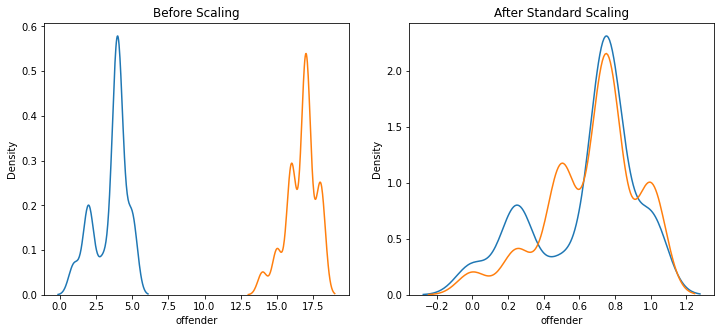

In [34]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train_oversampling['offender'], ax=ax1)
sns.kdeplot(X_train_oversampling['age'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled_oversampling['offender'], ax=ax2)
sns.kdeplot(X_train_scaled_oversampling['age'], ax=ax2)
plt.show()

# ZeroR Classifier

In [35]:
from sklearn.dummy import DummyClassifier

In [36]:
# Creating an instance of DummyClassifier with strategy 'most_frequent'
z_classifier = DummyClassifier(strategy='most_frequent')

# Training the classifier on the training set
z_classifier.fit(X_train_scaled_oversampling, y_train_oversampling)

# Making predictions on the testing set
y_pred = z_classifier.predict(X_test_oversampling)


In [37]:
from sklearn.metrics import classification_report

In [38]:
# Print the classification report
print(classification_report(y_test_oversampling, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.49      1.00      0.65        36

    accuracy                           0.49        74
   macro avg       0.24      0.50      0.33        74
weighted avg       0.24      0.49      0.32        74



# ***Random Forest Classifier***

In [39]:

# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)

# fit the model

rfc.fit(X_train_scaled_oversampling,y_train_oversampling)

# Predict the Test set results

y_pred = rfc.predict(X_test_scaled_oversampling)

# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test_oversampling, y_pred)))


Model accuracy score with 10 decision-trees : 0.9459


In [40]:
# Print the classification report
print(classification_report(y_test_oversampling, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        38
           1       0.97      0.92      0.94        36

    accuracy                           0.95        74
   macro avg       0.95      0.95      0.95        74
weighted avg       0.95      0.95      0.95        74



# Random Forest Classifier with n_estimators 100

In [41]:
# instantiate the classifier with n_estimators = 100
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
rfc_100.fit(X_train_scaled_oversampling,y_train_oversampling)

# Predict on the test set results
y_pred_100 = rfc_100.predict(X_test_scaled_oversampling)

# Check accuracy score 
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test_oversampling, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9459


In [42]:
# Print the classification report
print(classification_report(y_test_oversampling, y_pred_100))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        38
           1       0.97      0.92      0.94        36

    accuracy                           0.95        74
   macro avg       0.95      0.95      0.95        74
weighted avg       0.95      0.95      0.95        74



In [43]:
# view the feature scores

feature_scores = pd.Series(rfc_100.feature_importances_, index=X_train_scaled_oversampling.columns).sort_values(ascending=False)
feature_scores

SAVRY2          0.067225
SAVRY16         0.053489
SAVRY20         0.049772
offender        0.045738
SAVRY17         0.045168
age             0.040566
SAVRY18         0.039924
education       0.038341
familyincome    0.037886
SAVRY4          0.036610
SAVRY7          0.036530
SAVRY10         0.032324
SAVRY23         0.031742
SAVRY24         0.030074
SAVRY6          0.029148
SAVRY11         0.028805
SAVRY14         0.026852
SAVRY15         0.025783
SAVRY3          0.024763
SAVRY21         0.023492
SAVRY22         0.023217
SAVRY12         0.022776
SAVRY13         0.022563
SAVRY9          0.021800
SAVRY19         0.021557
SAVRY1          0.020417
P6              0.020098
SAVRY8          0.017936
P3              0.017644
P4              0.017570
P2              0.015134
P5              0.012689
P1              0.012518
SAVRY5          0.009850
dtype: float64

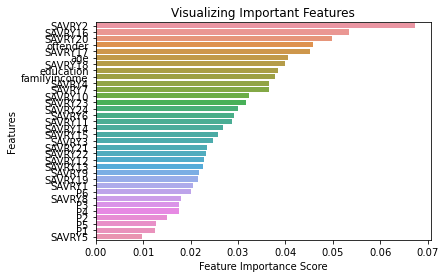

In [44]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')

# Add title to the graph

plt.title("Visualizing Important Features")

# Visualize the graph

plt.show()

In [45]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(rfc_100.score(X_train_scaled_oversampling, y_train_oversampling)))

print('Test set score: {:.4f}'.format(rfc_100.score(X_test_scaled_oversampling, y_test_oversampling)))

Training set score: 1.0000
Test set score: 0.9459


# Random Forest Classifier using randomized search CV

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from time import time

# Define the parameter distributions for the randomized search
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Create a Random Forest Classifier object
clf = RandomForestClassifier()

# Create a RandomizedSearchCV object with the specified number of iterations
n_iter_search = 20
rfc_random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=n_iter_search)

# Fit the RandomizedSearchCV object to your data
start = time()
rfc_random_search.fit(X_train_scaled_oversampling, y_train_oversampling)
print("RandomizedSearchCV took %.2f seconds for %d candidates parameter settings." % ((time() - start), n_iter_search))

# Get the best estimator from the RandomizedSearchCV
best_estimator = rfc_random_search.best_estimator_

# Make predictions on the test data
y_pred = best_estimator.predict(X_test_scaled_oversampling)

# Print the classification report
print(classification_report(y_test_oversampling, y_pred))


RandomizedSearchCV took 33.36 seconds for 20 candidates parameter settings.
              precision    recall  f1-score   support

           0       0.92      0.95      0.94        38
           1       0.94      0.92      0.93        36

    accuracy                           0.93        74
   macro avg       0.93      0.93      0.93        74
weighted avg       0.93      0.93      0.93        74



# Random Forest Classifier using grid search CV

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
rfc=RandomForestClassifier(random_state=42)

In [49]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [50]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train_scaled_oversampling, y_train_oversampling)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [51]:
CV_rfc.best_params_


{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [52]:
rfc1=RandomForestClassifier(random_state=42, max_features='log2', n_estimators= 200, max_depth=5, criterion='gini')


In [53]:
rfc1.fit(X_train_scaled_oversampling, y_train_oversampling)

RandomForestClassifier(max_depth=5, max_features='log2', n_estimators=200,
                       random_state=42)

In [54]:
pred=rfc1.predict(X_test_scaled_oversampling)

In [55]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test_oversampling,pred))

Accuracy for Random Forest on CV data:  0.8513513513513513


# Random Forest Classifier using hyperopt

In [56]:
!pip install hyperopt

In [57]:
from hyperopt import hp, fmin, tpe, Trials
from hyperopt import hp, fmin, tpe, Trials, space_eval
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split


# Define the hyperparameter search space using Hyperopt
space = {
    'n_estimators': hp.choice('n_estimators', range(100, 1000, 100)),
    'max_depth': hp.choice('max_depth', range(1, 20)),
    'min_samples_split': hp.choice('min_samples_split', range(2, 10)),
    'min_samples_leaf': hp.choice('min_samples_leaf', range(1, 10)),
    'max_features': hp.choice('max_features', ['sqrt', 'log2', None])
}

# Define the objective function to minimize
def objective(params):
    model = RandomForestClassifier(**params)
    score = cross_val_score(model, X_train_scaled_oversampling, y_train_oversampling, cv=5).mean()
    return {'loss': -score, 'status': 'ok'}

# Run the optimization using Hyperopt
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials)

# Get the best hyperparameters and evaluate the model performance
best_params = space_eval(space, best)
model = RandomForestClassifier(**best_params)
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled_oversampling, y_train_oversampling, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)


100%|█████████████████████████████████████████████| 100/100 [05:44<00:00,  3.45s/trial, best loss: -0.9009935710111046]
Best Hyperparameters: {'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 500}
Accuracy: 0.8305084745762712


In [58]:
report = classification_report(y_test, y_pred)
print("Best Hyperparameters:", best_params)
print("Classification Report:")
print(report)

Best Hyperparameters: {'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 500}
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82        30
           1       0.79      0.90      0.84        29

    accuracy                           0.83        59
   macro avg       0.84      0.83      0.83        59
weighted avg       0.84      0.83      0.83        59



# Random Forest Classifier using bayesian optimization

In [59]:
!pip install bayesian-optimization


In [60]:
from sklearn.model_selection import cross_val_score

from bayes_opt import BayesianOptimization

# Assuming you have feature data 'X' and target data 'y'

# Define the evaluation function for Bayesian Optimization
def evaluate_model(n_estimators, max_depth, min_samples_split):
    # Create a Random Forest classifier with the specified hyperparameters
    model = rfc

    # Perform cross-validation with 5 folds
    scores = cross_val_score(model, X_train_scaled_oversampling, y_train_oversampling, cv=5, scoring='accuracy')

    # Return the average accuracy score
    return scores.mean()

# Define the parameter ranges for Bayesian Optimization
param_ranges = {
    'n_estimators': (10, 1000),
    'max_depth': (1, 50),
    'min_samples_split': (2, 10)
}

# Perform Bayesian Optimization
optimizer = BayesianOptimization(evaluate_model, param_ranges)
optimizer.maximize(n_iter=10, init_points=5)

# Get the best hyperparameters
best_params = optimizer.max['params']
best_n_estimators = best_params['n_estimators']
best_max_depth = best_params['max_depth']
best_min_samples_split = best_params['min_samples_split']

# Train the final model with the best hyperparameters
final_model = RandomForestClassifier(
    n_estimators=int(best_n_estimators),
    max_depth=int(best_max_depth),
    min_samples_split=int(best_min_samples_split)
)
final_model.fit(X_train_scaled_oversampling, y_train_oversampling)
from sklearn.metrics import classification_report

# Generate predictions
y_pred = final_model.predict(X_train_scaled_oversampling)

# Generate the classification report
report = classification_report(y_train_oversampling, y_pred)
print(report)

|   iter    |  target   | max_depth | min_sa... | n_esti... |
-------------------------------------------------------------
| 1         | 0.8941    | 5.773     | 5.195     | 850.0     |
| 2         | 0.8941    | 15.98     | 2.943     | 796.6     |
| 3         | 0.8941    | 42.59     | 3.806     | 190.5     |
| 4         | 0.8941    | 18.69     | 2.943     | 724.6     |
| 5         | 0.8941    | 47.6      | 7.569     | 473.9     |
| 6         | 0.8941    | 2.176     | 4.898     | 10.11     |
| 7         | 0.8941    | 49.0      | 6.73      | 995.5     |
| 8         | 0.8941    | 43.8      | 6.646     | 839.9     |
| 9         | 0.8941    | 49.1      | 3.554     | 10.06     |
| 10        | 0.8941    | 22.21     | 8.244     | 169.0     |
| 11        | 0.8941    | 1.101     | 7.243     | 992.3     |
| 12        | 0.8941    | 1.674     | 2.029     | 12.12     |
| 13        | 0.8941    | 49.36     | 2.048     | 11.45     |
| 14        | 0.8941    | 9.924     | 8.294     | 348.9     |
| 15    

# Logistic Regression

In [61]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train_scaled_oversampling,y_train_oversampling)

LogisticRegression(random_state=0, solver='liblinear')

In [62]:
y_pred_test = logreg.predict(X_test_scaled_oversampling)

y_pred_test

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1], dtype=int64)

In [63]:
# probability of getting output as 0 - not reoffending

logreg.predict_proba(X_test_scaled_oversampling)[:,0]

array([0.54209302, 0.48710981, 0.24667242, 0.65533735, 0.23363305,
       0.88583673, 0.12035936, 0.3448206 , 0.66906665, 0.58846422,
       0.84578942, 0.8858789 , 0.67674021, 0.76887216, 0.33891172,
       0.67913105, 0.52603264, 0.28507204, 0.67674021, 0.59813316,
       0.96252416, 0.77103659, 0.45945396, 0.51799825, 0.48647063,
       0.45945396, 0.09625701, 0.37513993, 0.34095801, 0.21070664,
       0.89393704, 0.40866953, 0.56740588, 0.8069208 , 0.16331814,
       0.61132514, 0.33169133, 0.25052743, 0.61796968, 0.22928647,
       0.12122233, 0.19623293, 0.94918526, 0.61010645, 0.23363305,
       0.22396972, 0.75912624, 0.17217252, 0.88074695, 0.62719039,
       0.95322265, 0.71796308, 0.75066343, 0.12035936, 0.70031592,
       0.27685146, 0.55318096, 0.33540289, 0.3751441 , 0.95325576,
       0.44288575, 0.76891297, 0.56651507, 0.81955469, 0.12122233,
       0.25052743, 0.80597223, 0.94126837, 0.76157513, 0.12122233,
       0.45705028, 0.84443428, 0.93424273, 0.25657516])

In [64]:
# probability of getting output as 1 - reoffending

logreg.predict_proba(X_test_scaled_oversampling)[:,1]

array([0.45790698, 0.51289019, 0.75332758, 0.34466265, 0.76636695,
       0.11416327, 0.87964064, 0.6551794 , 0.33093335, 0.41153578,
       0.15421058, 0.1141211 , 0.32325979, 0.23112784, 0.66108828,
       0.32086895, 0.47396736, 0.71492796, 0.32325979, 0.40186684,
       0.03747584, 0.22896341, 0.54054604, 0.48200175, 0.51352937,
       0.54054604, 0.90374299, 0.62486007, 0.65904199, 0.78929336,
       0.10606296, 0.59133047, 0.43259412, 0.1930792 , 0.83668186,
       0.38867486, 0.66830867, 0.74947257, 0.38203032, 0.77071353,
       0.87877767, 0.80376707, 0.05081474, 0.38989355, 0.76636695,
       0.77603028, 0.24087376, 0.82782748, 0.11925305, 0.37280961,
       0.04677735, 0.28203692, 0.24933657, 0.87964064, 0.29968408,
       0.72314854, 0.44681904, 0.66459711, 0.6248559 , 0.04674424,
       0.55711425, 0.23108703, 0.43348493, 0.18044531, 0.87877767,
       0.74947257, 0.19402777, 0.05873163, 0.23842487, 0.87877767,
       0.54294972, 0.15556572, 0.06575727, 0.74342484])

In [65]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test_oversampling, y_pred_test)))

Model accuracy score: 0.7838


In [66]:
y_pred_train = logreg.predict(X_train_scaled_oversampling)

y_pred_train

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1], dtype=int64)

In [67]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train_oversampling, y_pred_train)))

Training-set accuracy score: 0.8082


In [68]:
# print the scores on training and test set(Check for overfitting and underfitting)

print('Training set score: {:.4f}'.format(logreg.score(X_train_scaled_oversampling, y_train_oversampling)))

print('Test set score: {:.4f}'.format(logreg.score(X_test_scaled_oversampling, y_test_oversampling)))

Training set score: 0.8082
Test set score: 0.7838


In [69]:
from sklearn.metrics import classification_report

print(classification_report(y_test_oversampling, y_pred_test))

              precision    recall  f1-score   support

           0       0.78      0.82      0.79        38
           1       0.79      0.75      0.77        36

    accuracy                           0.78        74
   macro avg       0.78      0.78      0.78        74
weighted avg       0.78      0.78      0.78        74



In [70]:
# fit the Logsitic Regression model with C=100

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(X_train_scaled_oversampling, y_train_oversampling)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [71]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train_scaled_oversampling, y_train_oversampling)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test_scaled_oversampling, y_test_oversampling)))

Training set score: 0.8151
Test set score: 0.7568


In [72]:
from sklearn.metrics import classification_report

print(classification_report(y_test_oversampling, y_pred_test))

              precision    recall  f1-score   support

           0       0.78      0.82      0.79        38
           1       0.79      0.75      0.77        36

    accuracy                           0.78        74
   macro avg       0.78      0.78      0.78        74
weighted avg       0.78      0.78      0.78        74



# LogisticRegression using GridSearch CV

In [73]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]



log_grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


log_grid_search.fit(X_train_scaled_oversampling, y_train_oversampling)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [74]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(log_grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (log_grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (log_grid_search.best_estimator_))

GridSearch CV best score : 0.7261


Parameters that give the best results : 

 {'penalty': 'l1'}


Estimator that was chosen by the search : 

 LogisticRegression(penalty='l1', random_state=0, solver='liblinear')


In [75]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(log_grid_search.score(X_test_scaled_oversampling, y_test_oversampling)))

GridSearch CV score on test set: 0.7432


# LogisticRegression using randomized search CV

In [76]:
max_iter = range(100, 500)
solver = ['lbfgs', 'newton-cg', 'liblinear']
warm_start = [True, False]
C = np.arange(0, 1, 0.01)
random_grid ={
    'max_iter' : max_iter,
    'warm_start' : warm_start,
    'solver' : solver,
    'C' : C,
}

In [77]:
random_estimator = RandomizedSearchCV(estimator = logreg,
                                   param_distributions = random_grid,
                                   n_iter = 100,
                                   scoring = 'accuracy',
                                   n_jobs = -1,
                                   verbose = 1, 
                                   random_state = 1,
                                  )

random_estimator.fit(X_test_scaled_oversampling, y_test_oversampling)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(estimator=LogisticRegression(random_state=0,
                                                solver='liblinear'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'C': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,...
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
                                        'max_iter': range(100, 500),
                                        'solver': ['lbfgs', 'newton-cg',
                                    

In [78]:
random_estimator.best_params_

best_estimator = random_estimator.best_estimator_

best_estimator.fit(X_test_scaled_oversampling, y_test_oversampling)

pred = best_estimator.predict(X_test_scaled_oversampling)

accuracy_score(pred, y_test_oversampling)

0.7702702702702703

In [79]:
from sklearn import metrics

In [80]:
from sklearn.metrics import accuracy_score, confusion_matrix

Test score: 0.77
Cohen Kappa score: 0.54


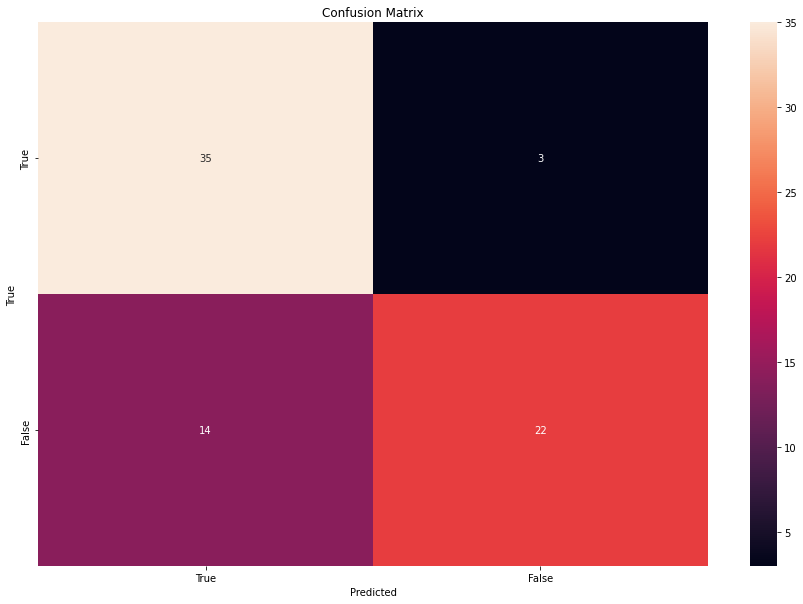

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import cohen_kappa_score

predicted = best_estimator.predict(X_test_scaled_oversampling)
print("Test score: {:.2f}".format(accuracy_score(y_test_oversampling,predicted)))
print("Cohen Kappa score: {:.2f}".format(cohen_kappa_score(y_test_oversampling,predicted)))
plt.figure(figsize=(15,10))
ax = sns.heatmap(confusion_matrix(y_test_oversampling,predicted),annot=True)
ax = ax.set(xlabel='Predicted',ylabel='True',title='Confusion Matrix',
            xticklabels=(['True', 'False']),
            yticklabels=(['True', 'False']))

# k Nearest Neighbours

In [82]:
# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier


# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)


# fit the model to the training set
knn.fit(X_train_scaled_oversampling, y_train_oversampling)

KNeighborsClassifier(n_neighbors=3)

In [83]:
y_pred = knn.predict(X_test_scaled_oversampling)

y_pred

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [84]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test_oversampling, y_pred)))

Model accuracy score: 0.7027


In [85]:
y_pred_train = knn.predict(X_train_scaled_oversampling)

In [86]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train_oversampling, y_pred_train)))

Training-set accuracy score: 0.8425


In [87]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(knn.score(X_train_scaled_oversampling, y_train_oversampling)))

print('Test set score: {:.4f}'.format(knn.score(X_test_scaled_oversampling, y_test_oversampling)))

Training set score: 0.8425
Test set score: 0.7027


In [88]:
from sklearn.metrics import classification_report

print(classification_report(y_test_oversampling, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.58      0.67        38
           1       0.65      0.83      0.73        36

    accuracy                           0.70        74
   macro avg       0.72      0.71      0.70        74
weighted avg       0.72      0.70      0.70        74



# KNN using randomized search CV

In [89]:
#Finding a best value of k for better accuracy
from sklearn import metrics
k_range=range(1,26)
scores=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled_oversampling,y_train_oversampling)
    y_pred=knn.predict(X_test_scaled_oversampling)
    scores.append(metrics.accuracy_score(y_test_oversampling, y_pred))

In [90]:
#Define the parameter values that should be searched
k_range=list(range(1,31))
options=['uniform', 'distance']

In [91]:
param_dist = dict(n_neighbors=k_range, weights=options)

In [92]:
#n_iter: Number of random combinations it would try
#random_state: Reproducibility/ Set seed

knn=KNeighborsClassifier()
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
rand.fit(X_train_scaled_oversampling,y_train_oversampling)

RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29, 30],
                                        'weights': ['uniform', 'distance']},
                   random_state=5, scoring='accuracy')

In [93]:
print(rand.best_score_)
print(rand.best_params_)

0.7708045977011494
{'weights': 'distance', 'n_neighbors': 16}


In [94]:
#Run RandomizedSearchCV 20 times (n_iter=10) and record the best score

best_scores=[]
for i in range(20):
    rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10)
    rand.fit(X_train_scaled_oversampling,y_train_oversampling)
    best_scores.append(round(rand.best_score_,3))
print(best_scores)

[0.774, 0.771, 0.805, 0.805, 0.771, 0.771, 0.805, 0.76, 0.805, 0.764, 0.805, 0.805, 0.771, 0.805, 0.774, 0.805, 0.805, 0.805, 0.771, 0.76]


In [95]:
from sklearn.metrics import classification_report

print(classification_report(y_test_oversampling, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75        38
           1       0.72      0.81      0.76        36

    accuracy                           0.76        74
   macro avg       0.76      0.76      0.76        74
weighted avg       0.76      0.76      0.76        74



# KNN using Grid Search

In [96]:
knn = KNeighborsClassifier()

In [97]:
param_grid = {
    'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10],  # Example values for n_neighbors
    'weights': ['uniform', 'distance'],  # Example values for weights
    'p': [1, 2]  # Example values for p
}

In [98]:
knn_grid_search = GridSearchCV(knn, param_grid, scoring='accuracy')

In [99]:
knn_grid_search.fit(X_train_scaled_oversampling, y_train_oversampling)  # X_train and y_train are your training data

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [100]:
best_params = knn_grid_search.best_params_
best_model = knn_grid_search.best_estimator_

In [101]:
y_pred = best_model.predict(X_test_scaled_oversampling)  # X_test is your test data

In [102]:
print(classification_report(y_test_oversampling, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.61      0.75        38
           1       0.71      1.00      0.83        36

    accuracy                           0.80        74
   macro avg       0.85      0.80      0.79        74
weighted avg       0.86      0.80      0.79        74



# XGBClassifier

In [103]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data_dmatrix = xgb.DMatrix(data=X_train_scaled_oversampling,label=y_train_oversampling)

# import XGBClassifier
from xgboost import XGBClassifier

# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }
            
            
            
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)



# fit the classifier to the training data
xgb_clf.fit(X_train_scaled_oversampling, y_train_oversampling)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [104]:
y_pred = xgb_clf.predict(X_test_scaled_oversampling)
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test_oversampling, y_pred)))     
#print(classification_report(y_test_oversampling, y_pred))

XGBoost model accuracy score: 0.7162


In [105]:
from xgboost import cv

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

In [106]:
xgb_cv.head()

train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.615699       0.082051       0.532396      0.024694
1        0.748255       0.036687       0.680880      0.050161
2        0.782541       0.043481       0.726037      0.051852
3        0.815614       0.036172       0.752346      0.050903
4        0.811211       0.034097       0.742329      0.053214

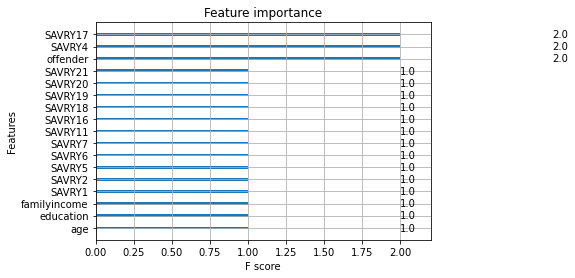

In [107]:
xgb.plot_importance(xgb_clf)
plt.rcParams['figure.figsize'] = [6, 4]
plt.show()

In [108]:
print(classification_report(y_test_oversampling, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73        38
           1       0.73      0.67      0.70        36

    accuracy                           0.72        74
   macro avg       0.72      0.71      0.71        74
weighted avg       0.72      0.72      0.72        74



# XGB using randomized search CV

In [109]:
model = XGBClassifier()


In [110]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Example values for n_estimators
    'max_depth': [3, 4, 5],           # Example values for max_depth
    'learning_rate': [0.1, 0.01, 0.001]  # Example values for learning_rate
}


In [111]:
xgb_random_search = RandomizedSearchCV(model, param_grid, n_iter=10, scoring='accuracy')


In [112]:
xgb_random_search.fit(X_train_scaled_oversampling, y_train_oversampling)  # X_train and y_train are your training data


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           max_cat_threshold=None,
                                           max_c

In [113]:
best_params = xgb_random_search.best_params_
best_model = xgb_random_search.best_estimator_


In [114]:
y_pred = best_model.predict(X_test_scaled_oversampling)  # X_test is your test data


In [115]:
print(classification_report(y_test_oversampling, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90        38
           1       0.87      0.94      0.91        36

    accuracy                           0.91        74
   macro avg       0.91      0.91      0.91        74
weighted avg       0.91      0.91      0.91        74



# XGB using grid search

In [116]:
model = XGBClassifier()


In [117]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Example values for n_estimators
    'max_depth': [3, 4, 5],           # Example values for max_depth
    'learning_rate': [0.1, 0.01, 0.001]  # Example values for learning_rate
}


In [118]:
xgb_grid_search = GridSearchCV(model, param_grid, scoring='accuracy')


In [119]:
xgb_grid_search.fit(X_train_scaled_oversampling, y_train_oversampling)  # X_train and y_train are your training data


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_

In [120]:
best_params = xgb_grid_search.best_params_
best_model = xgb_grid_search.best_estimator_


In [121]:
y_pred = best_model.predict(X_test_scaled_oversampling)  # X_test is your test data


In [122]:
print(classification_report(y_test_oversampling, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        38
           1       0.90      1.00      0.95        36

    accuracy                           0.95        74
   macro avg       0.95      0.95      0.95        74
weighted avg       0.95      0.95      0.95        74



# GradientBoostingClassifier

In [123]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Define the parameter grid with additional parameters
param_grid = {
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300],
    'subsample': [0.5, 0.75, 1],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create a GradientBoostingClassifier object
gb = GradientBoostingClassifier()

# Use RandomizedSearchCV to find the best hyperparameters
random_gb = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_grid,
    n_iter=100,
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit the RandomizedSearchCV object to the data
random_gb.fit(X_train_scaled_oversampling, y_train_oversampling)

# Print the best hyperparameters
print(random_gb.best_params_)

# Use the best estimator to make predictions on the test data
y_pred = random_gb.best_estimator_.predict(X_test_scaled_oversampling)

# Print the classification report
print(classification_report(y_test_oversampling, y_pred))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'subsample': 0.75, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.15}
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        38
           1       0.92      0.92      0.92        36

    accuracy                           0.92        74
   macro avg       0.92      0.92      0.92        74
weighted avg       0.92      0.92      0.92        74



In [124]:
print('Test set score: {:.4f}'.format(random_gb.score(X_test_scaled_oversampling, y_test_oversampling)))

Test set score: 0.9189


# GradientBoostingClassifier using Grid Search 

In [125]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7]
}

# Create a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()

# Perform grid search to find the best hyperparameters
gb_grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5)
gb_grid_search.fit(X_train_scaled_oversampling, y_train_oversampling)

# Get the best hyperparameters and model
best_params = gb_grid_search.best_params_
best_model = gb_grid_search.best_estimator_

# Train the model on the entire training set
best_model.fit(X_train_scaled_oversampling, y_train_oversampling)

# Make predictions on the test set
y_pred = best_model.predict(X_test_scaled_oversampling)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_oversampling, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        38
           1       0.86      0.89      0.88        36

    accuracy                           0.88        74
   macro avg       0.88      0.88      0.88        74
weighted avg       0.88      0.88      0.88        74



# Decision tree classifier


In [126]:
from sklearn.tree import DecisionTreeClassifier

In [127]:
# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Fit the classifier to the training data
dt_classifier.fit(X_train_scaled_oversampling, y_train_oversampling)

# Make predictions on the testing data
y_pred = dt_classifier.predict(X_test_scaled_oversampling)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test_oversampling, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8108108108108109


In [128]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(dt_classifier.score(X_train_scaled_oversampling, y_train_oversampling)))

print('Test set score: {:.4f}'.format(dt_classifier.score(X_test_scaled_oversampling, y_test_oversampling)))


Training set score: 1.0000
Test set score: 0.8108


In [129]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_oversampling, y_pred)

print('Confusion matrix\n\n', cm)


Confusion matrix

 [[25 13]
 [ 1 35]]


In [130]:
# Print the classification report
print(classification_report(y_test_oversampling, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.66      0.78        38
           1       0.73      0.97      0.83        36

    accuracy                           0.81        74
   macro avg       0.85      0.82      0.81        74
weighted avg       0.85      0.81      0.81        74



# Decision tree using randomized search

In [131]:
dt = DecisionTreeClassifier()


In [132]:
param_dist = {
    'criterion': ['gini', 'entropy'],  # Example values for criterion
    'max_depth': [None, 5, 10, 15],  # Example values for max_depth
    'min_samples_split': [2, 5, 10],  # Example values for min_samples_split
    'min_samples_leaf': [1, 2, 4],  # Example values for min_samples_leaf
    'max_features': ['auto', 'sqrt']  # Example values for max_features
}


In [133]:
dt_random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=10, scoring='accuracy')


In [134]:
dt_random_search.fit(X_train_scaled_oversampling,y_train_oversampling)  # X_train and y_train are your training data


RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 5, 10, 15],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   scoring='accuracy')

In [135]:
best_params = dt_random_search.best_params_
best_model = dt_random_search.best_estimator_


In [136]:
y_pred = best_model.predict(X_test_scaled_oversampling)  # X_test is your test data


In [137]:
print(classification_report(y_test_oversampling, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.76      0.81        38
           1       0.78      0.86      0.82        36

    accuracy                           0.81        74
   macro avg       0.81      0.81      0.81        74
weighted avg       0.82      0.81      0.81        74



# Decision tree using Grid search

In [138]:
dt = DecisionTreeClassifier()


In [139]:
param_grid = {
    'criterion': ['gini', 'entropy'],  # Example values for criterion
    'max_depth': [None, 5, 10, 15],  # Example values for max_depth
    'min_samples_split': [2, 5, 10],  # Example values for min_samples_split
    'min_samples_leaf': [1, 2, 4],  # Example values for min_samples_leaf
    'max_features': ['auto', 'sqrt']  # Example values for max_features
}


In [140]:
dt_grid_search = GridSearchCV(dt, param_grid, scoring='accuracy')


In [141]:
dt_grid_search.fit(X_train_scaled_oversampling,y_train_oversampling)  # X_train and y_train are your training data


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [142]:
best_params = dt_grid_search.best_params_
best_model = dt_grid_search.best_estimator_


In [143]:
y_pred = best_model.predict(X_test_scaled_oversampling)  # X_test is your test data

In [144]:
print(classification_report(y_test_oversampling, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        38
           1       0.86      0.89      0.88        36

    accuracy                           0.88        74
   macro avg       0.88      0.88      0.88        74
weighted avg       0.88      0.88      0.88        74



# NAIVE BAYES(Gaussian)

In [145]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train_scaled_oversampling, y_train_oversampling)

GaussianNB()

In [146]:
y_pred = gnb.predict(X_test_scaled_oversampling)


In [147]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test_oversampling, y_pred)))

Model accuracy score: 0.7162


In [148]:
y_pred_train = gnb.predict(X_train_scaled_oversampling)


In [149]:
# Print the classification report
print(classification_report(y_test_oversampling, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73        38
           1       0.71      0.69      0.70        36

    accuracy                           0.72        74
   macro avg       0.72      0.72      0.72        74
weighted avg       0.72      0.72      0.72        74



# NAIVE BAYES(BernoulliNB)

In [150]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

BernNB = BernoulliNB(binarize=0.0, fit_prior=True, class_prior=None)
BernNB.fit(X_train_scaled_oversampling, y_train_oversampling)
print(BernNB)


y_pred = BernNB.predict(X_test_scaled_oversampling)


print(classification_report(y_test_oversampling, y_pred))


BernoulliNB()
              precision    recall  f1-score   support

           0       0.71      0.66      0.68        38
           1       0.67      0.72      0.69        36

    accuracy                           0.69        74
   macro avg       0.69      0.69      0.69        74
weighted avg       0.69      0.69      0.69        74



# NAIVE BAYES(BernoulliNB) using Grid Search

In [151]:
nbbernouli = BernoulliNB()

In [152]:
parameters = {
    'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)
}
nb_grid_search = GridSearchCV(nbbernouli, parameters)
nb_grid_search.fit(X_train_scaled_oversampling, y_train_oversampling)
nb_grid_search.best_params_


{'alpha': 0.1}

In [153]:
print(classification_report(y_test_oversampling, pred))

              precision    recall  f1-score   support

           0       0.71      0.92      0.80        38
           1       0.88      0.61      0.72        36

    accuracy                           0.77        74
   macro avg       0.80      0.77      0.76        74
weighted avg       0.79      0.77      0.76        74



# NAIVE BAYES(Multinomial)

In [154]:
MultiNB = MultinomialNB(fit_prior=True, class_prior=None)
MultiNB.fit(X_train_scaled_oversampling, y_train_oversampling)
print(MultiNB)


y_pred = MultiNB.predict(X_test_scaled_oversampling)


print(classification_report(y_test_oversampling, y_pred))

MultinomialNB()
              precision    recall  f1-score   support

           0       0.75      0.79      0.77        38
           1       0.76      0.72      0.74        36

    accuracy                           0.76        74
   macro avg       0.76      0.76      0.76        74
weighted avg       0.76      0.76      0.76        74



# NAIVE BAYES(Multinomial) using Grid Search

In [155]:
nb = MultinomialNB()
parameters = {
    'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)
}
nbmu_grid_search = GridSearchCV(nb, parameters)
nbmu_grid_search.fit(X_train_scaled_oversampling, y_train_oversampling)
nbmu_grid_search.best_params_
nb = MultinomialNB(alpha=1)
nb.fit(X_train_scaled_oversampling, y_train_oversampling)
pred = nb.predict(X_test_scaled_oversampling)

print(classification_report(y_test_oversampling, pred))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77        38
           1       0.76      0.72      0.74        36

    accuracy                           0.76        74
   macro avg       0.76      0.76      0.76        74
weighted avg       0.76      0.76      0.76        74



# SVM with default hyperparameters

In [156]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train_scaled_oversampling,y_train_oversampling)


# make predictions on test set
y_pred=svc.predict(X_test_scaled_oversampling)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test_oversampling, y_pred)))

Model accuracy score with default hyperparameters: 0.8243


In [157]:
# instantiate classifier with rbf kernel and C=100
svc100=SVC(C=100.0) 


# fit classifier to training set
svc100.fit(X_train_scaled_oversampling,y_train_oversampling)


# make predictions on test set
y_pred=svc100.predict(X_test_scaled_oversampling)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test_oversampling, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.8649


In [158]:
# Print the classification report
print(classification_report(y_test_oversampling, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86        38
           1       0.82      0.92      0.87        36

    accuracy                           0.86        74
   macro avg       0.87      0.87      0.86        74
weighted avg       0.87      0.86      0.86        74



# SVM with rbf kernel and C=1000.0

In [159]:
# instantiate classifier with rbf kernel and C=1000
svc1000=SVC(C=1000.0) 


# fit classifier to training set
svc1000.fit(X_train_scaled_oversampling,y_train_oversampling)


# make predictions on test set
y_pred=svc1000.predict(X_test_scaled_oversampling)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test_oversampling, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.8649


In [160]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(svc.score(X_train_scaled_oversampling, y_train_oversampling)))

print('Test set score: {:.4f}'.format(svc.score(X_test_scaled_oversampling, y_test_oversampling)))

Training set score: 0.9212
Test set score: 0.8243


In [161]:
# Print the classification report
print(classification_report(y_test_oversampling, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86        38
           1       0.82      0.92      0.87        36

    accuracy                           0.86        74
   macro avg       0.87      0.87      0.86        74
weighted avg       0.87      0.86      0.86        74



# SVM using randomized Search 

In [162]:
svm = SVC()

In [163]:
param_dist = {
    'C': [0.1, 1, 10],  # Example values for C (regularization parameter)
    'kernel': ['linear', 'rbf', 'poly'],  # Example values for kernel type
    'gamma': ['scale', 'auto'],  # Example values for gamma (kernel coefficient)
    'degree': [2, 3, 4]  # Example values for degree (polynomial degree)
}


In [164]:
svm_random_search = RandomizedSearchCV(svm, param_distributions=param_dist, n_iter=10, scoring='accuracy')


In [165]:
svm_random_search.fit(X_train_scaled_oversampling,y_train_oversampling)  # X_train and y_train are your training data


RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf', 'poly']},
                   scoring='accuracy')

In [166]:
best_params = svm_random_search.best_params_
best_model = svm_random_search.best_estimator_


In [167]:
y_pred = best_model.predict(X_test_scaled_oversampling)  # X_test is your test data


In [168]:
print(classification_report(y_test_oversampling, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.76      0.83        38
           1       0.79      0.92      0.85        36

    accuracy                           0.84        74
   macro avg       0.85      0.84      0.84        74
weighted avg       0.85      0.84      0.84        74



# SVM using grid Search 

In [169]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Create an SVM classifier
svm_classifier = svm.SVC()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled_oversampling, y_train_oversampling)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
svm_best_model = grid_search.best_estimator_

# Train the model on the entire training set
svm_best_model.fit(X_train_scaled_oversampling, y_train_oversampling)

# Make predictions on the test set
y_pred = svm_best_model.predict(X_test_scaled_oversampling)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_oversampling, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.82      0.86        38
           1       0.82      0.92      0.87        36

    accuracy                           0.86        74
   macro avg       0.87      0.87      0.86        74
weighted avg       0.87      0.86      0.86        74



# Multi-layer Perceptron classifier - MLP

In [170]:
from sklearn.neural_network import MLPClassifier

In [171]:
# Creating an instance of MLPClassifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', random_state=42)

# Training the classifier on the training set
mlp_classifier.fit(X_train_scaled_oversampling, y_train_oversampling)

# Making predictions on the testing set
y_pred = mlp_classifier.predict(X_test_scaled_oversampling)

In [172]:
# Print the classification report
print(classification_report(y_test_oversampling, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89        38
           1       0.87      0.92      0.89        36

    accuracy                           0.89        74
   macro avg       0.89      0.89      0.89        74
weighted avg       0.89      0.89      0.89        74



# MLP using randomized search

In [173]:
mlp = MLPClassifier()


In [174]:
param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],  # Example values for hidden_layer_sizes
    'activation': ['logistic', 'relu'],  # Example values for activation
    'solver': ['adam', 'sgd'],  # Example values for solver
    'alpha': [0.0001, 0.001, 0.01]  # Example values for alpha
}


In [175]:
mlp_random_search = RandomizedSearchCV(mlp, param_distributions=param_dist, n_iter=10, scoring='accuracy')


In [176]:
mlp_random_search.fit(X_train_scaled_oversampling,y_train_oversampling)  # X_train and y_train are your training data


RandomizedSearchCV(estimator=MLPClassifier(),
                   param_distributions={'activation': ['logistic', 'relu'],
                                        'alpha': [0.0001, 0.001, 0.01],
                                        'hidden_layer_sizes': [(50,), (100,),
                                                               (50, 50),
                                                               (100, 100)],
                                        'solver': ['adam', 'sgd']},
                   scoring='accuracy')

In [177]:
best_params = mlp_random_search.best_params_
best_model = mlp_random_search.best_estimator_


In [178]:
y_pred = best_model.predict(X_test_scaled_oversampling)  # X_test is your test data


In [179]:
print(classification_report(y_test_oversampling, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.79      0.85        38
           1       0.80      0.92      0.86        36

    accuracy                           0.85        74
   macro avg       0.86      0.85      0.85        74
weighted avg       0.86      0.85      0.85        74



# MLP using grid search

In [180]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['logistic', 'relu'],
    'alpha': [0.0001, 0.001, 0.01]
}

# Create an MLP classifier
mlp_classifier = MLPClassifier()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=mlp_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled_oversampling, y_train_oversampling)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
mlp_best_model = grid_search.best_estimator_

# Train the model on the entire training set
mlp_best_model.fit(X_train_scaled_oversampling, y_train_oversampling)

# Make predictions on the test set
y_pred = mlp_best_model.predict(X_test_scaled_oversampling)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_oversampling, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89        38
           1       0.87      0.92      0.89        36

    accuracy                           0.89        74
   macro avg       0.89      0.89      0.89        74
weighted avg       0.89      0.89      0.89        74



# Perceptron

In [181]:
from sklearn.linear_model import Perceptron

# Creating an instance of Perceptron
p_classifier = Perceptron()

# Training the classifier on the training set
p_classifier.fit(X_train_scaled_oversampling, y_train_oversampling)

# Making predictions on the testing set
y_pred = p_classifier.predict(X_test_scaled_oversampling)

In [182]:
# Print the classification report
print(classification_report(y_test_oversampling, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.82      0.69        38
           1       0.68      0.42      0.52        36

    accuracy                           0.62        74
   macro avg       0.64      0.62      0.60        74
weighted avg       0.64      0.62      0.61        74



# CNN

In [183]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
from sklearn.model_selection import train_test_split


# Load your data
data = pd.read_csv('chinareci.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

ModuleNotFoundError: No module named 'torch'

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Convert data to tensors
X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train)
X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test)

In [ ]:
# Create a TensorDataset and DataLoader for the training data
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=1)
test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=1)

In [ ]:
# Define the CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=32, kernel_size=3)
        self.pool = nn.MaxPool1d(kernel_size=2)
        self.fc1 = nn.Linear(34 * 16 , 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(-1, 34 * 16 )
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
# Initialize the model and optimizer
model = CNN()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [ ]:
# Train the model
for epoch in range(500):
    running_loss = 0.0
    for i, data in enumerate(test_dataloader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = nn.CrossEntropyLoss()(outputs, labels.long())
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch: {epoch} Loss: {running_loss / len(test_dataloader)}')

In [ ]:
# Evaluate the model on the test data
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    outputs = model(X_test)
    _, predicted = torch.max(outputs.data, 1)
    total += y_test.size(0)
    correct += (predicted == y_test.long()).sum().item()

print(f'Accuracy of the CNN model: {correct / total}')

# Ensemble(VotingClassifier)


In [184]:
classifier1 = DecisionTreeClassifier()
classifier2 = RandomForestClassifier()
classifier3 = LogisticRegression()

from sklearn.ensemble import VotingClassifier

# Create an ensemble of classifiers using VotingClassifier
ensemble_vo = VotingClassifier(estimators=[('dt', classifier1), ('rf', classifier2), ('lr', classifier3)])

# Fit the ensemble model on the training data
ensemble_vo.fit(X_train_scaled_oversampling, y_train_oversampling)

# Generate predictions on the testing data
y_pred = ensemble_vo.predict(X_test_scaled_oversampling)

# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.94      0.89      0.92        38
           1       0.89      0.94      0.92        36

    accuracy                           0.92        74
   macro avg       0.92      0.92      0.92        74
weighted avg       0.92      0.92      0.92        74



# Ensemble(BaggingClassifier)


In [185]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Create the base classifiers
classifier1 = DecisionTreeClassifier()
classifier2 = RandomForestClassifier()
classifier3 = LogisticRegression()

# Create the bagging ensemble
bagging_classifier = BaggingClassifier(base_estimator=classifier1,
                                       n_estimators=10,  # Number of base classifiers
                                       random_state=42)

# Fit the bagging ensemble to your data
bagging_classifier.fit(X_train_scaled_oversampling, y_train_oversampling)  # Replace X and y with your training data

# Generate predictions on the testing data
y_pred = bagging_classifier.predict(X_test_scaled_oversampling)

# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        38
           1       0.91      0.89      0.90        36

    accuracy                           0.91        74
   macro avg       0.91      0.90      0.91        74
weighted avg       0.91      0.91      0.91        74



# Ensemble(AdaBoostClassifier)

In [186]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Create the base classifiers
classifier1 = DecisionTreeClassifier()
classifier2 = RandomForestClassifier()
classifier3 = LogisticRegression()

# Create the boosting ensemble
boosting_classifier = AdaBoostClassifier(base_estimator=classifier1,
                                         n_estimators=10,  # Number of base classifiers
                                         random_state=42)

# Fit the boosting ensemble to your data
boosting_classifier.fit(X_train_scaled_oversampling, y_train_oversampling)  # Replace X and y with your training data

# Generate predictions on the testing data
y_pred = boosting_classifier.predict(X_test_scaled_oversampling)

# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.68      0.80        38
           1       0.74      0.97      0.84        36

    accuracy                           0.82        74
   macro avg       0.85      0.83      0.82        74
weighted avg       0.86      0.82      0.82        74



# Ensemble(StackingClassifier)

In [187]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Create the base classifiers
classifier1 = DecisionTreeClassifier()
classifier2 = RandomForestClassifier()
classifier3 = LogisticRegression()

# Create the stacking ensemble
estimators = [('dt', classifier1), ('rf', classifier2), ('lr', classifier3)]
stacking_classifier = StackingClassifier(estimators=estimators,
                                         final_estimator=LogisticRegression())

# Fit the stacking ensemble to your data
stacking_classifier.fit(X_train_scaled_oversampling, y_train_oversampling)  

# Generate predictions on the testing data
y_pred = stacking_classifier.predict(X_test_scaled_oversampling)

# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.93      0.97      0.95        38
           1       0.97      0.92      0.94        36

    accuracy                           0.95        74
   macro avg       0.95      0.95      0.95        74
weighted avg       0.95      0.95      0.95        74



# variance threshold

# Zero R

In [188]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [189]:
# Apply variance threshold to select relevant features
threshold = 0.1  # Set the threshold value
selector = VarianceThreshold(threshold=threshold)
X_train_selected = selector.fit_transform(X_train_scaled_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

# Train a logistic regression model on the selected features
model = z_classifier
model.fit(X_train_selected, y_train_oversampling)

# Generate predictions on the testing data
y_pred = model.predict(X_test_selected)
# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.49      1.00      0.65        36

    accuracy                           0.49        74
   macro avg       0.24      0.50      0.33        74
weighted avg       0.24      0.49      0.32        74



# Random Forest

In [190]:
# Apply variance threshold to select relevant features
threshold = 0.1  # Set the threshold value
selector = VarianceThreshold(threshold=threshold)
X_train_selected = selector.fit_transform(X_train_scaled_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

# Train a logistic regression model on the selected features
model =rfc
model.fit(X_train_selected, y_train_oversampling)

# Generate predictions on the testing data
y_pred = model.predict(X_test_selected)
# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        38
           1       0.97      0.97      0.97        36

    accuracy                           0.97        74
   macro avg       0.97      0.97      0.97        74
weighted avg       0.97      0.97      0.97        74



# Random Forest Classifier with n_estimators 100

In [191]:
# Apply variance threshold to select relevant features
threshold = 0.1  # Set the threshold value
selector = VarianceThreshold(threshold=threshold)
X_train_selected = selector.fit_transform(X_train_scaled_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

# Train a logistic regression model on the selected features
model =rfc_100
model.fit(X_train_selected, y_train_oversampling)

# Generate predictions on the testing data
y_pred = model.predict(X_test_selected)
# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        38
           1       0.95      0.97      0.96        36

    accuracy                           0.96        74
   macro avg       0.96      0.96      0.96        74
weighted avg       0.96      0.96      0.96        74



# Random Forest Classifier using randomized search CV

In [192]:
# Apply variance threshold to select relevant features
threshold = 0.1  # Set the threshold value
selector = VarianceThreshold(threshold=threshold)
X_train_selected = selector.fit_transform(X_train_scaled_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

# Train a logistic regression model on the selected features
model = rfc_random_search
model.fit(X_train_selected, y_train_oversampling)

# Generate predictions on the testing data
y_pred = model.predict(X_test_selected)
# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.87      0.92        38
           1       0.88      0.97      0.92        36

    accuracy                           0.92        74
   macro avg       0.92      0.92      0.92        74
weighted avg       0.92      0.92      0.92        74



# Random Forest Classifier using grid search CV

In [193]:
# Apply variance threshold to select relevant features
threshold = 0.1  # Set the threshold value
selector = VarianceThreshold(threshold=threshold)
X_train_selected = selector.fit_transform(X_train_scaled_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

# Train a logistic regression model on the selected features
model =rfc1
model.fit(X_train_selected, y_train_oversampling)

# Generate predictions on the testing data
y_pred = model.predict(X_test_selected)
# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        38
           1       0.83      0.81      0.82        36

    accuracy                           0.82        74
   macro avg       0.82      0.82      0.82        74
weighted avg       0.82      0.82      0.82        74



# Random Forest Classifier using hyperopt

In [194]:
# Apply variance threshold to select relevant features
threshold = 0.1  # Set the threshold value
selector = VarianceThreshold(threshold=threshold)
X_train_selected = selector.fit_transform(X_train_scaled_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

# Train a logistic regression model on the selected features
model =model
model.fit(X_train_selected, y_train_oversampling)

# Generate predictions on the testing data
y_pred = model.predict(X_test_selected)
# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        38
           1       0.83      0.81      0.82        36

    accuracy                           0.82        74
   macro avg       0.82      0.82      0.82        74
weighted avg       0.82      0.82      0.82        74



# Random Forest Classifier using bayesian optimization

In [195]:
# Apply variance threshold to select relevant features
threshold = 0.1  # Set the threshold value
selector = VarianceThreshold(threshold=threshold)
X_train_selected = selector.fit_transform(X_train_scaled_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

# Train a logistic regression model on the selected features
model =final_model
model.fit(X_train_selected, y_train_oversampling)

# Generate predictions on the testing data
y_pred = model.predict(X_test_selected)
# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        38
           1       0.86      0.86      0.86        36

    accuracy                           0.86        74
   macro avg       0.86      0.86      0.86        74
weighted avg       0.86      0.86      0.86        74



# Logistic Regression

In [196]:
# Apply variance threshold to select relevant features
threshold = 0.1  # Set the threshold value
selector = VarianceThreshold(threshold=threshold)
X_train_selected = selector.fit_transform(X_train_scaled_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

# Train a logistic regression model on the selected features
model = logreg
model.fit(X_train_selected, y_train_oversampling)

# Generate predictions on the testing data
y_pred = model.predict(X_test_selected)
# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.74      0.76        38
           1       0.74      0.78      0.76        36

    accuracy                           0.76        74
   macro avg       0.76      0.76      0.76        74
weighted avg       0.76      0.76      0.76        74



# Logsitic Regression model with C=100

In [197]:
# Apply variance threshold to select relevant features
threshold = 0.1  # Set the threshold value
selector = VarianceThreshold(threshold=threshold)
X_train_selected = selector.fit_transform(X_train_scaled_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

# Train a logistic regression model on the selected features
model = logreg100
model.fit(X_train_selected, y_train_oversampling)

# Generate predictions on the testing data
y_pred = model.predict(X_test_selected)
# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.72      0.68      0.70        38
           1       0.68      0.72      0.70        36

    accuracy                           0.70        74
   macro avg       0.70      0.70      0.70        74
weighted avg       0.70      0.70      0.70        74



# LogisticRegression using GridSearch CV

In [198]:
# Apply variance threshold to select relevant features
threshold = 0.1  # Set the threshold value
selector = VarianceThreshold(threshold=threshold)
X_train_selected = selector.fit_transform(X_train_scaled_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

# Train a logistic regression model on the selected features
model =log_grid_search
model.fit(X_train_selected, y_train_oversampling)

# Generate predictions on the testing data
y_pred = model.predict(X_test_selected)
# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.76      0.78        38
           1       0.76      0.81      0.78        36

    accuracy                           0.78        74
   macro avg       0.78      0.78      0.78        74
weighted avg       0.78      0.78      0.78        74



# LogisticRegression using randomized search CV

In [200]:
# Apply variance threshold to select relevant features
threshold = 0.1  # Set the threshold value
selector = VarianceThreshold(threshold=threshold)
X_train_selected = selector.fit_transform(X_train_scaled_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

# Train a logistic regression model on the selected features
model = random_estimator
model.fit(X_train_selected, y_train_oversampling)

# Generate predictions on the testing data
y_pred = model.predict(X_test_selected)
# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)
print(report)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
              precision    recall  f1-score   support

           0       0.74      0.68      0.71        38
           1       0.69      0.75      0.72        36

    accuracy                           0.72        74
   macro avg       0.72      0.72      0.72        74
weighted avg       0.72      0.72      0.72        74



# k Nearest Neighbours

In [201]:
# Apply variance threshold to select relevant features
threshold = 0.1  # Set the threshold value
selector = VarianceThreshold(threshold=threshold)
X_train_selected = selector.fit_transform(X_train_scaled_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

# Train a logistic regression model on the selected features
model = knn
model.fit(X_train_selected, y_train_oversampling)

# Generate predictions on the testing data
y_pred = model.predict(X_test_selected)
# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.71      0.73        38
           1       0.71      0.75      0.73        36

    accuracy                           0.73        74
   macro avg       0.73      0.73      0.73        74
weighted avg       0.73      0.73      0.73        74



# KNN using randomized search CV

In [202]:
# Apply variance threshold to select relevant features
threshold = 0.1  # Set the threshold value
selector = VarianceThreshold(threshold=threshold)
X_train_selected = selector.fit_transform(X_train_scaled_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

# Train a logistic regression model on the selected features
model = rand
model.fit(X_train_selected, y_train_oversampling)

# Generate predictions on the testing data
y_pred = model.predict(X_test_selected)
# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.82      0.89        38
           1       0.83      0.97      0.90        36

    accuracy                           0.89        74
   macro avg       0.90      0.89      0.89        74
weighted avg       0.90      0.89      0.89        74



# KNN using Grid Search

In [203]:
# Apply variance threshold to select relevant features
threshold = 0.1  # Set the threshold value
selector = VarianceThreshold(threshold=threshold)
X_train_selected = selector.fit_transform(X_train_scaled_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

# Train a logistic regression model on the selected features
model = knn_grid_search
model.fit(X_train_selected, y_train_oversampling)

# Generate predictions on the testing data
y_pred = model.predict(X_test_selected)
# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.74      0.85        38
           1       0.78      1.00      0.88        36

    accuracy                           0.86        74
   macro avg       0.89      0.87      0.86        74
weighted avg       0.89      0.86      0.86        74



# XGBClassifier

In [204]:
# Apply variance threshold to select relevant features
threshold = 0.1  # Set the threshold value
selector = VarianceThreshold(threshold=threshold)
X_train_selected = selector.fit_transform(X_train_scaled_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

# Train a logistic regression model on the selected features
model = xgb_clf
model.fit(X_train_selected, y_train_oversampling)

# Generate predictions on the testing data
y_pred = model.predict(X_test_selected)
# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.87      0.81        38
           1       0.84      0.72      0.78        36

    accuracy                           0.80        74
   macro avg       0.80      0.80      0.80        74
weighted avg       0.80      0.80      0.80        74



# XGB using randomized search CV

In [205]:
# Apply variance threshold to select relevant features
threshold = 0.1  # Set the threshold value
selector = VarianceThreshold(threshold=threshold)
X_train_selected = selector.fit_transform(X_train_scaled_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

# Train a logistic regression model on the selected features
model = xgb_random_search
model.fit(X_train_selected, y_train_oversampling)

# Generate predictions on the testing data
y_pred = model.predict(X_test_selected)
# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.92      0.95        38
           1       0.92      0.97      0.95        36

    accuracy                           0.95        74
   macro avg       0.95      0.95      0.95        74
weighted avg       0.95      0.95      0.95        74



# XGB using grid search

In [206]:
# Apply variance threshold to select relevant features
threshold = 0.1  # Set the threshold value
selector = VarianceThreshold(threshold=threshold)
X_train_selected = selector.fit_transform(X_train_scaled_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

# Train a logistic regression model on the selected features
model = xgb_grid_search
model.fit(X_train_selected, y_train_oversampling)

# Generate predictions on the testing data
y_pred = model.predict(X_test_selected)
# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.89      0.93        38
           1       0.90      0.97      0.93        36

    accuracy                           0.93        74
   macro avg       0.93      0.93      0.93        74
weighted avg       0.94      0.93      0.93        74



# GradientBoostingClassifier

In [207]:
# Apply variance threshold to select relevant features
threshold = 0.1  # Set the threshold value
selector = VarianceThreshold(threshold=threshold)
X_train_selected = selector.fit_transform(X_train_scaled_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

# Train a logistic regression model on the selected features
model = random_gb
model.fit(X_train_selected, y_train_oversampling)

# Generate predictions on the testing data
y_pred = model.predict(X_test_selected)
# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)
print(report)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
              precision    recall  f1-score   support

           0       0.97      0.89      0.93        38
           1       0.90      0.97      0.93        36

    accuracy                           0.93        74
   macro avg       0.93      0.93      0.93        74
weighted avg       0.94      0.93      0.93        74



# GradientBoostingClassifier using Grid Search

In [208]:
# Apply variance threshold to select relevant features
threshold = 0.1  # Set the threshold value
selector = VarianceThreshold(threshold=threshold)
X_train_selected = selector.fit_transform(X_train_scaled_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

# Train a logistic regression model on the selected features
model = best_model
model.fit(X_train_selected, y_train_oversampling)

# Generate predictions on the testing data
y_pred = model.predict(X_test_selected)
# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.79      0.85        38
           1       0.80      0.92      0.86        36

    accuracy                           0.85        74
   macro avg       0.86      0.85      0.85        74
weighted avg       0.86      0.85      0.85        74



# Decision tree classifier

In [209]:
# Apply variance threshold to select relevant features
threshold = 0.1  # Set the threshold value
selector = VarianceThreshold(threshold=threshold)
X_train_selected = selector.fit_transform(X_train_scaled_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

# Train a logistic regression model on the selected features
model = dt_classifier
model.fit(X_train_selected, y_train_oversampling)

# Generate predictions on the testing data
y_pred = model.predict(X_test_selected)
# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.66      0.79        38
           1       0.73      1.00      0.85        36

    accuracy                           0.82        74
   macro avg       0.87      0.83      0.82        74
weighted avg       0.87      0.82      0.82        74



# Decision tree using randomized search

In [210]:
# Apply variance threshold to select relevant features
threshold = 0.1  # Set the threshold value
selector = VarianceThreshold(threshold=threshold)
X_train_selected = selector.fit_transform(X_train_scaled_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

# Train a logistic regression model on the selected features
model = dt_random_search
model.fit(X_train_selected, y_train_oversampling)

# Generate predictions on the testing data
y_pred = model.predict(X_test_selected)
# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.74      0.82        38
           1       0.77      0.94      0.85        36

    accuracy                           0.84        74
   macro avg       0.85      0.84      0.84        74
weighted avg       0.86      0.84      0.84        74



# Decision tree using Grid search

In [211]:
# Apply variance threshold to select relevant features
threshold = 0.1  # Set the threshold value
selector = VarianceThreshold(threshold=threshold)
X_train_selected = selector.fit_transform(X_train_scaled_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

# Train a logistic regression model on the selected features
model = dt_grid_search
model.fit(X_train_selected, y_train_oversampling)

# Generate predictions on the testing data
y_pred = model.predict(X_test_selected)
# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.82      0.89        38
           1       0.83      0.97      0.90        36

    accuracy                           0.89        74
   macro avg       0.90      0.89      0.89        74
weighted avg       0.90      0.89      0.89        74



# NAIVE BAYES(Gaussian)

In [212]:
# Apply variance threshold to select relevant features
threshold = 0.1  # Set the threshold value
selector = VarianceThreshold(threshold=threshold)
X_train_selected = selector.fit_transform(X_train_scaled_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

# Train a logistic regression model on the selected features
model = gnb
model.fit(X_train_selected, y_train_oversampling)

# Generate predictions on the testing data
y_pred = model.predict(X_test_selected)
# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.71      0.71      0.71        38
           1       0.69      0.69      0.69        36

    accuracy                           0.70        74
   macro avg       0.70      0.70      0.70        74
weighted avg       0.70      0.70      0.70        74



# NAIVE BAYES(BernoulliNB)

In [213]:
# Apply variance threshold to select relevant features
threshold = 0.1  # Set the threshold value
selector = VarianceThreshold(threshold=threshold)
X_train_selected = selector.fit_transform(X_train_scaled_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

# Train a logistic regression model on the selected features
model = BernNB
model.fit(X_train_selected, y_train_oversampling)

# Generate predictions on the testing data
y_pred = model.predict(X_test_selected)
# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.71      0.66      0.68        38
           1       0.67      0.72      0.69        36

    accuracy                           0.69        74
   macro avg       0.69      0.69      0.69        74
weighted avg       0.69      0.69      0.69        74



# NAIVE BAYES(BernoulliNB) using Grid Search

In [214]:
# Apply variance threshold to select relevant features
threshold = 0.1  # Set the threshold value
selector = VarianceThreshold(threshold=threshold)
X_train_selected = selector.fit_transform(X_train_scaled_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

# Train a logistic regression model on the selected features
model = nb_grid_search
model.fit(X_train_selected, y_train_oversampling)

# Generate predictions on the testing data
y_pred = model.predict(X_test_selected)
# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.71      0.66      0.68        38
           1       0.67      0.72      0.69        36

    accuracy                           0.69        74
   macro avg       0.69      0.69      0.69        74
weighted avg       0.69      0.69      0.69        74



# NAIVE BAYES(Multinomial)

In [215]:
# Apply variance threshold to select relevant features
threshold = 0.1  # Set the threshold value
selector = VarianceThreshold(threshold=threshold)
X_train_selected = selector.fit_transform(X_train_scaled_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

# Train a logistic regression model on the selected features
model = MultiNB
model.fit(X_train_selected, y_train_oversampling)

# Generate predictions on the testing data
y_pred = model.predict(X_test_selected)
# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.63      0.63      0.63        38
           1       0.61      0.61      0.61        36

    accuracy                           0.62        74
   macro avg       0.62      0.62      0.62        74
weighted avg       0.62      0.62      0.62        74



# NAIVE BAYES(Multinomial) using Grid Search

In [216]:
# Apply variance threshold to select relevant features
threshold = 0.1  # Set the threshold value
selector = VarianceThreshold(threshold=threshold)
X_train_selected = selector.fit_transform(X_train_scaled_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

# Train a logistic regression model on the selected features
model = nbmu_grid_search
model.fit(X_train_selected, y_train_oversampling)

# Generate predictions on the testing data
y_pred = model.predict(X_test_selected)
# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.60      0.63      0.62        38
           1       0.59      0.56      0.57        36

    accuracy                           0.59        74
   macro avg       0.59      0.59      0.59        74
weighted avg       0.59      0.59      0.59        74



# SVM with default hyperparameters

In [217]:
# Apply variance threshold to select relevant features
threshold = 0.1  # Set the threshold value
selector = VarianceThreshold(threshold=threshold)
X_train_selected = selector.fit_transform(X_train_scaled_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

# Train a logistic regression model on the selected features
model = svc
model.fit(X_train_selected, y_train_oversampling)

# Generate predictions on the testing data
y_pred = model.predict(X_test_selected)
# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        38
           1       0.83      0.81      0.82        36

    accuracy                           0.82        74
   macro avg       0.82      0.82      0.82        74
weighted avg       0.82      0.82      0.82        74



# SVM with rbf kernel and C=100



In [218]:
# Apply variance threshold to select relevant features
threshold = 0.1  # Set the threshold value
selector = VarianceThreshold(threshold=threshold)
X_train_selected = selector.fit_transform(X_train_scaled_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

# Train a logistic regression model on the selected features
model = svc100
model.fit(X_train_selected, y_train_oversampling)

# Generate predictions on the testing data
y_pred = model.predict(X_test_selected)
# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.84      0.89        38
           1       0.85      0.94      0.89        36

    accuracy                           0.89        74
   macro avg       0.90      0.89      0.89        74
weighted avg       0.90      0.89      0.89        74



# SVM with rbf kernel and C=1000.0

In [219]:
# Apply variance threshold to select relevant features
threshold = 0.1  # Set the threshold value
selector = VarianceThreshold(threshold=threshold)
X_train_selected = selector.fit_transform(X_train_scaled_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

# Train a logistic regression model on the selected features
model = svc1000
model.fit(X_train_selected, y_train_oversampling)

# Generate predictions on the testing data
y_pred = model.predict(X_test_selected)
# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.84      0.89        38
           1       0.85      0.94      0.89        36

    accuracy                           0.89        74
   macro avg       0.90      0.89      0.89        74
weighted avg       0.90      0.89      0.89        74



# SVM using randomized Search

In [220]:
# Apply variance threshold to select relevant features
threshold = 0.1  # Set the threshold value
selector = VarianceThreshold(threshold=threshold)
X_train_selected = selector.fit_transform(X_train_scaled_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

# Train a logistic regression model on the selected features
model = svm_random_search
model.fit(X_train_selected, y_train_oversampling)

# Generate predictions on the testing data
y_pred = model.predict(X_test_selected)
# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        38
           1       0.86      0.86      0.86        36

    accuracy                           0.86        74
   macro avg       0.86      0.86      0.86        74
weighted avg       0.86      0.86      0.86        74



# SVM using grid Search

In [221]:
# Apply variance threshold to select relevant features
threshold = 0.1  # Set the threshold value
selector = VarianceThreshold(threshold=threshold)
X_train_selected = selector.fit_transform(X_train_scaled_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

# Train a logistic regression model on the selected features
model = svm_best_model
model.fit(X_train_selected, y_train_oversampling)

# Generate predictions on the testing data
y_pred = model.predict(X_test_selected)
# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.82      0.87        38
           1       0.83      0.94      0.88        36

    accuracy                           0.88        74
   macro avg       0.88      0.88      0.88        74
weighted avg       0.89      0.88      0.88        74



# Multi-layer Perceptron classifier - MLP

In [222]:
# Apply variance threshold to select relevant features
threshold = 0.1  # Set the threshold value
selector = VarianceThreshold(threshold=threshold)
X_train_selected = selector.fit_transform(X_train_scaled_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

# Train a logistic regression model on the selected features
model = mlp_classifier
model.fit(X_train_selected, y_train_oversampling)

# Generate predictions on the testing data
y_pred = model.predict(X_test_selected)
# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.92      0.88        38
           1       0.91      0.81      0.85        36

    accuracy                           0.86        74
   macro avg       0.87      0.86      0.86        74
weighted avg       0.87      0.86      0.86        74



# MLP using randomized search

In [223]:
# Apply variance threshold to select relevant features
threshold = 0.1  # Set the threshold value
selector = VarianceThreshold(threshold=threshold)
X_train_selected = selector.fit_transform(X_train_scaled_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

# Train a logistic regression model on the selected features
model = mlp_random_search
model.fit(X_train_selected, y_train_oversampling)

# Generate predictions on the testing data
y_pred = model.predict(X_test_selected)
# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88        38
           1       0.89      0.86      0.87        36

    accuracy                           0.88        74
   macro avg       0.88      0.88      0.88        74
weighted avg       0.88      0.88      0.88        74



# MLP using grid search

In [224]:
# Apply variance threshold to select relevant features
threshold = 0.1  # Set the threshold value
selector = VarianceThreshold(threshold=threshold)
X_train_selected = selector.fit_transform(X_train_scaled_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

# Train a logistic regression model on the selected features
model = mlp_best_model
model.fit(X_train_selected, y_train_oversampling)

# Generate predictions on the testing data
y_pred = model.predict(X_test_selected)
# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        38
           1       0.86      0.86      0.86        36

    accuracy                           0.86        74
   macro avg       0.86      0.86      0.86        74
weighted avg       0.86      0.86      0.86        74



# Perceptron

In [225]:
# Apply variance threshold to select relevant features
threshold = 0.1  # Set the threshold value
selector = VarianceThreshold(threshold=threshold)
X_train_selected = selector.fit_transform(X_train_scaled_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

# Train a logistic regression model on the selected features
model = p_classifier
model.fit(X_train_selected, y_train_oversampling)

# Generate predictions on the testing data
y_pred = model.predict(X_test_selected)
# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.53      0.62        38
           1       0.62      0.83      0.71        36

    accuracy                           0.68        74
   macro avg       0.70      0.68      0.67        74
weighted avg       0.70      0.68      0.67        74



# Ensemble(VotingClassifier)

In [226]:
# Apply variance threshold to select relevant features
threshold = 0.1  # Set the threshold value
selector = VarianceThreshold(threshold=threshold)
X_train_selected = selector.fit_transform(X_train_scaled_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

# Train a logistic regression model on the selected features
model = ensemble_vo
model.fit(X_train_selected, y_train_oversampling)

# Generate predictions on the testing data
y_pred = model.predict(X_test_selected)
# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.82      0.87        38
           1       0.83      0.94      0.88        36

    accuracy                           0.88        74
   macro avg       0.88      0.88      0.88        74
weighted avg       0.89      0.88      0.88        74



# Ensemble(BaggingClassifier)

In [227]:
# Apply variance threshold to select relevant features
threshold = 0.1  # Set the threshold value
selector = VarianceThreshold(threshold=threshold)
X_train_selected = selector.fit_transform(X_train_scaled_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

# Train a logistic regression model on the selected features
model = bagging_classifier
model.fit(X_train_selected, y_train_oversampling)

# Generate predictions on the testing data
y_pred = model.predict(X_test_selected)
# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.87      0.92        38
           1       0.88      0.97      0.92        36

    accuracy                           0.92        74
   macro avg       0.92      0.92      0.92        74
weighted avg       0.92      0.92      0.92        74



# Ensemble(AdaBoostClassifier)

In [228]:
# Apply variance threshold to select relevant features
threshold = 0.1  # Set the threshold value
selector = VarianceThreshold(threshold=threshold)
X_train_selected = selector.fit_transform(X_train_scaled_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

# Train a logistic regression model on the selected features
model = boosting_classifier
model.fit(X_train_selected, y_train_oversampling)

# Generate predictions on the testing data
y_pred = model.predict(X_test_selected)
# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.66      0.77        38
           1       0.72      0.94      0.82        36

    accuracy                           0.80        74
   macro avg       0.82      0.80      0.79        74
weighted avg       0.83      0.80      0.79        74



# Ensemble(StackingClassifier)

In [229]:
# Apply variance threshold to select relevant features
threshold = 0.1  # Set the threshold value
selector = VarianceThreshold(threshold=threshold)
X_train_selected = selector.fit_transform(X_train_scaled_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

# Train a logistic regression model on the selected features
model = stacking_classifier
model.fit(X_train_selected, y_train_oversampling)

# Generate predictions on the testing data
y_pred = model.predict(X_test_selected)
# Generate the classification report
report = classification_report(y_test_oversampling, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        38
           1       0.97      0.92      0.94        36

    accuracy                           0.95        74
   macro avg       0.95      0.95      0.95        74
weighted avg       0.95      0.95      0.95        74



# Mutual Information

In [230]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# Zero R

In [231]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_classif, k=20)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)
model =z_classifier
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
accuracy = model.score(X_test_selected, y_test_oversampling)
print("Accuracy:", accuracy)


Accuracy: 0.4864864864864865


# ***Random Forest Classifier***

In [232]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_classif, k=20)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)
model =rfc
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
accuracy = model.score(X_test_selected, y_test_oversampling)
print("Accuracy:", accuracy)


Accuracy: 0.9324324324324325


# Random Forest Classifier with n_estimators 100

In [233]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_classif, k=20)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)
model =rfc_100
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
accuracy = model.score(X_test_selected, y_test_oversampling)
print("Accuracy:", accuracy)


Accuracy: 0.918918918918919


# Random Forest Classifier using randomized search CV

In [234]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_classif, k=20)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)
model =rfc_random_search
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
accuracy = model.score(X_test_selected, y_test_oversampling)
print("Accuracy:", accuracy)


Accuracy: 0.9459459459459459


# Random Forest Classifier using grid search CV

In [235]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_classif, k=20)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)
model =rfc1
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
accuracy = model.score(X_test_selected, y_test_oversampling)
print("Accuracy:", accuracy)


Accuracy: 0.8648648648648649


# Random Forest Classifier using hyperopt

In [236]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_classif, k=20)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)
model =model
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
accuracy = model.score(X_test_selected, y_test_oversampling)
print("Accuracy:", accuracy)


Accuracy: 0.8378378378378378


# Random Forest Classifier using bayesian optimization

In [237]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_classif, k=20)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)
model = final_model
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
accuracy = model.score(X_test_selected, y_test_oversampling)
print("Accuracy:", accuracy)


Accuracy: 0.8513513513513513


# Logistic Regression

In [238]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_classif, k=20)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)
model =logreg
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
accuracy = model.score(X_test_selected, y_test_oversampling)
print("Accuracy:", accuracy)


Accuracy: 0.7702702702702703


# Logsitic Regression model with C=100

In [239]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_classif, k=20)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)
model =logreg100
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
accuracy = model.score(X_test_selected, y_test_oversampling)
print("Accuracy:", accuracy)


Accuracy: 0.7702702702702703


# LogisticRegression using GridSearch CV

In [240]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_classif, k=20)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)
model = log_grid_search
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
accuracy = model.score(X_test_selected, y_test_oversampling)
print("Accuracy:", accuracy)


Accuracy: 0.7162162162162162


# LogisticRegression using randomized search CV

In [242]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_classif, k=20)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)
model =random_estimator
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
accuracy = model.score(X_test_selected, y_test_oversampling)
print("Accuracy:", accuracy)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Accuracy: 0.7567567567567568


# k Nearest Neighbours

In [243]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_classif, k=20)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)
model =knn
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
accuracy = model.score(X_test_selected, y_test_oversampling)
print("Accuracy:", accuracy)


Accuracy: 0.8243243243243243


# KNN using randomized search CV

In [244]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_classif, k=20)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)
model =rand
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
accuracy = model.score(X_test_selected, y_test_oversampling)
print("Accuracy:", accuracy)


Accuracy: 0.8378378378378378


# KNN using Grid Search

In [245]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_classif, k=20)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)
model =knn_grid_search
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
accuracy = model.score(X_test_selected, y_test_oversampling)
print("Accuracy:", accuracy)


Accuracy: 0.7837837837837838


# XGBClassifier

In [246]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_classif, k=20)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)
model =xgb_clf
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
accuracy = model.score(X_test_selected, y_test_oversampling)
print("Accuracy:", accuracy)


Accuracy: 0.7297297297297297


# XGB using randomized search CV

In [247]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_classif, k=20)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)
model = xgb_random_search
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
accuracy = model.score(X_test_selected, y_test_oversampling)
print("Accuracy:", accuracy)


Accuracy: 0.8918918918918919


# XGB using grid search

In [248]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_classif, k=20)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)
model = xgb_grid_search
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
accuracy = model.score(X_test_selected, y_test_oversampling)
print("Accuracy:", accuracy)


Accuracy: 0.9054054054054054


# GradientBoostingClassifier

In [249]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_classif, k=20)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)
model =random_gb
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
accuracy = model.score(X_test_selected, y_test_oversampling)
print("Accuracy:", accuracy)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Accuracy: 0.8918918918918919


# GradientBoostingClassifier using Grid Search 

In [250]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_classif, k=20)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)
model =best_model
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
accuracy = model.score(X_test_selected, y_test_oversampling)
print("Accuracy:", accuracy)


Accuracy: 0.8378378378378378


# Decision tree classifier


In [251]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_classif, k=20)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)
model = dt_classifier
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
accuracy = model.score(X_test_selected, y_test_oversampling)
print("Accuracy:", accuracy)


Accuracy: 0.8918918918918919


# Decision tree using randomized search

In [252]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_classif, k=20)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)
model = dt_random_search
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
accuracy = model.score(X_test_selected, y_test_oversampling)
print("Accuracy:", accuracy)


Accuracy: 0.7297297297297297


# Decision tree using Grid search

In [253]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_classif, k=20)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)
model =dt_grid_search
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
accuracy = model.score(X_test_selected, y_test_oversampling)
print("Accuracy:", accuracy)


Accuracy: 0.9459459459459459


# NAIVE BAYES(Gaussian)

In [254]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_classif, k=20)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)
model = gnb
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
accuracy = model.score(X_test_selected, y_test_oversampling)
print("Accuracy:", accuracy)


Accuracy: 0.6486486486486487


# NAIVE BAYES(BernoulliNB)

In [255]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_classif, k=20)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)
model = BernNB
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
accuracy = model.score(X_test_selected, y_test_oversampling)
print("Accuracy:", accuracy)


Accuracy: 0.6756756756756757


# NAIVE BAYES(BernoulliNB) using Grid Search

In [256]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_classif, k=20)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)
model = nb_grid_search
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
accuracy = model.score(X_test_selected, y_test_oversampling)
print("Accuracy:", accuracy)


Accuracy: 0.6756756756756757


# NAIVE BAYES(Multinomial)

In [257]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_classif, k=20)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)
model = MultiNB
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
accuracy = model.score(X_test_selected, y_test_oversampling)
print("Accuracy:", accuracy)


Accuracy: 0.7162162162162162


# NAIVE BAYES(Multinomial) using Grid Search

In [258]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_classif, k=20)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)
model = nbmu_grid_search
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
accuracy = model.score(X_test_selected, y_test_oversampling)
print("Accuracy:", accuracy)


Accuracy: 0.6891891891891891


# SVM with default hyperparameters

In [259]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_classif, k=20)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)
model = svc
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
accuracy = model.score(X_test_selected, y_test_oversampling)
print("Accuracy:", accuracy)


Accuracy: 0.8513513513513513


# SVM with rbf kernel and C=100

In [260]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_classif, k=20)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)
model = svc100
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
accuracy = model.score(X_test_selected, y_test_oversampling)
print("Accuracy:", accuracy)


Accuracy: 0.918918918918919


# SVM with rbf kernel and C=1000.0

In [261]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_classif, k=20)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)
model = svc1000
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
accuracy = model.score(X_test_selected, y_test_oversampling)
print("Accuracy:", accuracy)


Accuracy: 0.9324324324324325


# SVM using randomized Search 

In [262]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_classif, k=20)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)
model = svm_random_search
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
accuracy = model.score(X_test_selected, y_test_oversampling)
print("Accuracy:", accuracy)


Accuracy: 0.7837837837837838


# SVM using grid Search 

In [263]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_classif, k=20)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)
model = svm_best_model
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
accuracy = model.score(X_test_selected, y_test_oversampling)
print("Accuracy:", accuracy)


Accuracy: 0.8648648648648649


# Multi-layer Perceptron classifier - MLP

In [264]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_classif, k=20)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)
model =mlp_classifier
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
accuracy = model.score(X_test_selected, y_test_oversampling)
print("Accuracy:", accuracy)


Accuracy: 0.8648648648648649


# MLP using randomized search

In [265]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_classif, k=20)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)
model = mlp_random_search
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
accuracy = model.score(X_test_selected, y_test_oversampling)
print("Accuracy:", accuracy)


Accuracy: 0.8108108108108109


# MLP using grid search

In [266]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_classif, k=20)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)
model = mlp_best_model
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
accuracy = model.score(X_test_selected, y_test_oversampling)
print("Accuracy:", accuracy)


Accuracy: 0.9054054054054054


# Perceptron

In [267]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_classif, k=20)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)
model = p_classifier
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
accuracy = model.score(X_test_selected, y_test_oversampling)
print("Accuracy:", accuracy)


Accuracy: 0.6756756756756757


# Ensemble(VotingClassifier)


In [268]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_classif, k=20)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)
model =ensemble_vo
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
accuracy = model.score(X_test_selected, y_test_oversampling)
print("Accuracy:", accuracy)


Accuracy: 0.9054054054054054


# Ensemble(BaggingClassifier)


In [269]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_classif, k=20)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)
model =bagging_classifier
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
accuracy = model.score(X_test_selected, y_test_oversampling)
print("Accuracy:", accuracy)


Accuracy: 0.9054054054054054


# Ensemble(AdaBoostClassifier)

In [270]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_classif, k=20)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)
model =boosting_classifier
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
accuracy = model.score(X_test_selected, y_test_oversampling)
print("Accuracy:", accuracy)


Accuracy: 0.8918918918918919


# Ensemble(StackingClassifier)

In [271]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_classif, k=20)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)
model =stacking_classifier
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
accuracy = model.score(X_test_selected, y_test_oversampling)
print("Accuracy:", accuracy)


Accuracy: 0.9594594594594594


# mutual information regression

In [272]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.model_selection import train_test_split

# zero r

In [273]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_regression, k=20)  
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

model =z_classifier
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
r_squared = model.score(X_test_selected, y_test_oversampling)
print("R-squared:", r_squared)

R-squared: 0.4864864864864865


# random forest

In [274]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_regression, k=20)  
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

model =rfc
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
r_squared = model.score(X_test_selected, y_test_oversampling)
print("R-squared:", r_squared)

R-squared: 0.9324324324324325


# Random Forest Classifier with n_estimators 100

In [275]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_regression, k=20)  
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

model =rfc_100
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
r_squared = model.score(X_test_selected, y_test_oversampling)
print("R-squared:", r_squared)

R-squared: 0.9594594594594594


# Random Forest Classifier using randomized search CV

In [276]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_regression, k=20)  
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

model =rfc_random_search
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
r_squared = model.score(X_test_selected, y_test_oversampling)
print("R-squared:", r_squared)

R-squared: 0.9594594594594594


# Random Forest Classifier using grid search CV

In [277]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_regression, k=20)  
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

model =rfc1
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
r_squared = model.score(X_test_selected, y_test_oversampling)
print("R-squared:", r_squared)

R-squared: 0.8243243243243243


# Random Forest Classifier using hyperopt

In [278]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_regression, k=20)  
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

model =model
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
r_squared = model.score(X_test_selected, y_test_oversampling)
print("R-squared:", r_squared)

R-squared: 0.8513513513513513


# Random Forest Classifier using bayesian optimization

In [279]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_regression, k=20)  
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

model =final_model
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
r_squared = model.score(X_test_selected, y_test_oversampling)
print("R-squared:", r_squared)

R-squared: 0.8648648648648649


# Logistic Regression

In [280]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_regression, k=20)  
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

model =logreg
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
r_squared = model.score(X_test_selected, y_test_oversampling)
print("R-squared:", r_squared)

R-squared: 0.7297297297297297


# Logsitic Regression model with C=100

In [281]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_regression, k=20)  
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

model =logreg100
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
r_squared = model.score(X_test_selected, y_test_oversampling)
print("R-squared:", r_squared)

R-squared: 0.7162162162162162


# LogisticRegression using GridSearch CV

In [282]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_regression, k=20)  
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

model = log_grid_search
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
r_squared = model.score(X_test_selected, y_test_oversampling)
print("R-squared:", r_squared)

R-squared: 0.7837837837837838


# LogisticRegression using randomized search CV

In [283]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_regression, k=20)  
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

model =random_estimator
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
r_squared = model.score(X_test_selected, y_test_oversampling)
print("R-squared:", r_squared)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
R-squared: 0.6891891891891891


# k Nearest Neighbours

In [284]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_regression, k=20)  
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

model =knn
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
r_squared = model.score(X_test_selected, y_test_oversampling)
print("R-squared:", r_squared)

R-squared: 0.7972972972972973


# KNN using randomized search CV

In [285]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_regression, k=20)  
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

model =rand
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
r_squared = model.score(X_test_selected, y_test_oversampling)
print("R-squared:", r_squared)

R-squared: 0.8243243243243243


# KNN using Grid Search

In [286]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_regression, k=20)  
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

model = knn_grid_search
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
r_squared = model.score(X_test_selected, y_test_oversampling)
print("R-squared:", r_squared)

R-squared: 0.8648648648648649


# XGBClassifier

In [287]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_regression, k=20)  
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

model =xgb_clf
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
r_squared = model.score(X_test_selected, y_test_oversampling)
print("R-squared:", r_squared)

R-squared: 0.7432432432432432


# XGB using randomized search CV

In [288]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_regression, k=20)  
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

model = xgb_random_search
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
r_squared = model.score(X_test_selected, y_test_oversampling)
print("R-squared:", r_squared)

R-squared: 0.8513513513513513


# XGB using grid search

In [289]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_regression, k=20)  
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

model = xgb_grid_search
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
r_squared = model.score(X_test_selected, y_test_oversampling)
print("R-squared:", r_squared)

R-squared: 0.8783783783783784


# GradientBoostingClassifier

In [290]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_regression, k=20)  
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

model =random_gb
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
r_squared = model.score(X_test_selected, y_test_oversampling)
print("R-squared:", r_squared)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
R-squared: 0.8243243243243243


# GradientBoostingClassifier using Grid Search

In [291]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_regression, k=20)  
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

model =best_model
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
r_squared = model.score(X_test_selected, y_test_oversampling)
print("R-squared:", r_squared)

R-squared: 0.8918918918918919


# Decision tree classifier

In [292]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_regression, k=20)  
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

model = dt_random_search
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
r_squared = model.score(X_test_selected, y_test_oversampling)
print("R-squared:", r_squared)

R-squared: 0.7432432432432432


# Decision tree using randomized search

In [293]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_regression, k=20)  
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

model = dt_random_search
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
r_squared = model.score(X_test_selected, y_test_oversampling)
print("R-squared:", r_squared)

R-squared: 0.918918918918919


# Decision tree using Grid search

In [294]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_regression, k=20)  
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

model = dt_grid_search
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
r_squared = model.score(X_test_selected, y_test_oversampling)
print("R-squared:", r_squared)

R-squared: 0.8918918918918919


# NAIVE BAYES(Gaussian)

In [295]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_regression, k=20)  
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

model =gnb
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
r_squared = model.score(X_test_selected, y_test_oversampling)
print("R-squared:", r_squared)

R-squared: 0.7297297297297297


# NAIVE BAYES(BernoulliNB)

In [296]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_regression, k=20)  
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

model =BernNB
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
r_squared = model.score(X_test_selected, y_test_oversampling)
print("R-squared:", r_squared)

R-squared: 0.6486486486486487


# NAIVE BAYES(BernoulliNB) using Grid Search

In [297]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_regression, k=20)  
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

model = nb_grid_search
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
r_squared = model.score(X_test_selected, y_test_oversampling)
print("R-squared:", r_squared)

R-squared: 0.7297297297297297


# NAIVE BAYES(Multinomial)

In [298]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_regression, k=20)  
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

model =MultiNB
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
r_squared = model.score(X_test_selected, y_test_oversampling)
print("R-squared:", r_squared)

R-squared: 0.6621621621621622


# NAIVE BAYES(Multinomial) using Grid Search

In [299]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_regression, k=20)  
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

model = nbmu_grid_search
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
r_squared = model.score(X_test_selected, y_test_oversampling)
print("R-squared:", r_squared)

R-squared: 0.6891891891891891


# SVM with default hyperparameters

In [300]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_regression, k=20)  
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

model =svc
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
r_squared = model.score(X_test_selected, y_test_oversampling)
print("R-squared:", r_squared)

R-squared: 0.8243243243243243


# C=100

In [301]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_regression, k=20)  
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

model =svc100
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
r_squared = model.score(X_test_selected, y_test_oversampling)
print("R-squared:", r_squared)

R-squared: 0.8243243243243243


# C=1000.0

In [302]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_regression, k=20)  
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

model =svc1000
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
r_squared = model.score(X_test_selected, y_test_oversampling)
print("R-squared:", r_squared)

R-squared: 0.9054054054054054


# SVM using randomized Search

In [303]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_regression, k=20)  
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

model = svm_random_search
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
r_squared = model.score(X_test_selected, y_test_oversampling)
print("R-squared:", r_squared)

R-squared: 0.7972972972972973


# SVM using grid Search

In [304]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_regression, k=20)  
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

model = svm_best_model
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
r_squared = model.score(X_test_selected, y_test_oversampling)
print("R-squared:", r_squared)

R-squared: 0.8783783783783784


# Multi-layer Perceptron classifier - MLP

In [305]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_regression, k=20)  
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

model = mlp_classifier
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
r_squared = model.score(X_test_selected, y_test_oversampling)
print("R-squared:", r_squared)

R-squared: 0.8108108108108109


# MLP using randomized search

In [306]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_regression, k=20)  
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

model = mlp_random_search
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
r_squared = model.score(X_test_selected, y_test_oversampling)
print("R-squared:", r_squared)

R-squared: 0.9054054054054054


# MLP using grid search

In [307]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_regression, k=20)  
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

model = mlp_best_model
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
r_squared = model.score(X_test_selected, y_test_oversampling)
print("R-squared:", r_squared)

R-squared: 0.8378378378378378


# Perceptron

In [308]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_regression, k=20)  
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

model = p_classifier
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
r_squared = model.score(X_test_selected, y_test_oversampling)
print("R-squared:", r_squared)

R-squared: 0.6891891891891891


# Ensemble(VotingClassifier)

In [309]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_regression, k=20)  
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

model = ensemble_vo
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
r_squared = model.score(X_test_selected, y_test_oversampling)
print("R-squared:", r_squared)

R-squared: 0.9054054054054054


# Ensemble(BaggingClassifier)

In [310]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_regression, k=20)  
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

model = bagging_classifier
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
r_squared = model.score(X_test_selected, y_test_oversampling)
print("R-squared:", r_squared)

R-squared: 0.918918918918919


# Ensemble(AdaBoostClassifier)

In [311]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_regression, k=20)  
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

model =boosting_classifier
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
r_squared = model.score(X_test_selected, y_test_oversampling)
print("R-squared:", r_squared)

R-squared: 0.8648648648648649


# Ensemble(StackingClassifier)

In [312]:
# Perform feature selection using SelectKBest and mutual information score
selector = SelectKBest(score_func=mutual_info_regression, k=20)  
X_train_selected = selector.fit_transform(X_train_scaled_oversampling, y_train_oversampling)
X_test_selected = selector.transform(X_test_scaled_oversampling)

model =stacking_classifier
# Fit the model to the training data with selected features
model.fit(X_train_selected, y_train_oversampling)

# Evaluate the model on the testing data with selected features
r_squared = model.score(X_test_selected, y_test_oversampling)
print("R-squared:", r_squared)

R-squared: 0.9594594594594594


# Lime for random forest

In [313]:
import lime.lime_tabular
from interpret.blackbox import LimeTabular
from interpret import show
from lime import lime_tabular

In [315]:
rf_classifier = rfc_random_search
rf_classifier.fit(X_train_scaled_oversampling, y_train_oversampling)
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_scaled_oversampling),
    feature_names=X_train_scaled_oversampling.columns,
    class_names=['Low','High'],
    mode='classification'
)

In [316]:
X_test_scaled_oversampling.iloc[5], y_test_oversampling.iloc[5]

(age             1.0
 education       0.6
 familyincome    0.4
 offender        1.0
 SAVRY1          0.5
 SAVRY2          0.0
 SAVRY3          0.5
 SAVRY4          0.5
 SAVRY5          0.0
 SAVRY6          0.0
 SAVRY7          0.0
 SAVRY8          0.0
 SAVRY9          1.0
 SAVRY10         0.5
 SAVRY11         0.5
 SAVRY12         0.0
 SAVRY13         0.0
 SAVRY14         0.0
 SAVRY15         0.0
 SAVRY16         0.5
 SAVRY17         0.5
 SAVRY18         0.0
 SAVRY19         0.5
 SAVRY20         1.0
 SAVRY21         0.5
 SAVRY22         0.0
 SAVRY23         1.0
 SAVRY24         1.0
 P1              1.0
 P2              0.0
 P3              0.0
 P4              0.0
 P5              0.0
 P6              1.0
 Name: 5, dtype: float64,
 0)

In [317]:
y_test_oversampling.iloc[5]

0

In [318]:
exp = explainer.explain_instance(
    data_row=X_test_scaled_oversampling.iloc[5], 
    predict_fn=rf_classifier.predict_proba, num_features = 20
)

exp.show_in_notebook(show_table=True)

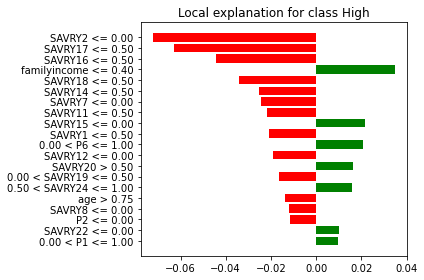

In [319]:
plt = exp.as_pyplot_figure()
plt.tight_layout()

# Lime for ensemble(StackingClassifier)

In [320]:
rf_classifier =stacking_classifier
rf_classifier.fit(X_train_scaled_oversampling, y_train_oversampling)
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_scaled_oversampling),
    feature_names=X_train_scaled_oversampling.columns,
    class_names=['Low','High'],
    mode='classification'
)

In [321]:
X_test_scaled_oversampling.iloc[5], y_test_oversampling.iloc[5]

(age             1.0
 education       0.6
 familyincome    0.4
 offender        1.0
 SAVRY1          0.5
 SAVRY2          0.0
 SAVRY3          0.5
 SAVRY4          0.5
 SAVRY5          0.0
 SAVRY6          0.0
 SAVRY7          0.0
 SAVRY8          0.0
 SAVRY9          1.0
 SAVRY10         0.5
 SAVRY11         0.5
 SAVRY12         0.0
 SAVRY13         0.0
 SAVRY14         0.0
 SAVRY15         0.0
 SAVRY16         0.5
 SAVRY17         0.5
 SAVRY18         0.0
 SAVRY19         0.5
 SAVRY20         1.0
 SAVRY21         0.5
 SAVRY22         0.0
 SAVRY23         1.0
 SAVRY24         1.0
 P1              1.0
 P2              0.0
 P3              0.0
 P4              0.0
 P5              0.0
 P6              1.0
 Name: 5, dtype: float64,
 0)

In [322]:
y_test_oversampling.iloc[5]

0

In [323]:
exp = explainer.explain_instance(
    data_row=X_test_scaled_oversampling.iloc[5], 
    predict_fn=rf_classifier.predict_proba, num_features = 20
)

exp.show_in_notebook(show_table=True)








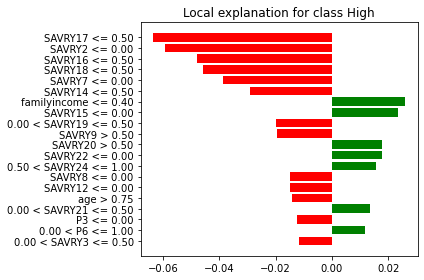

In [324]:
plt = exp.as_pyplot_figure()
plt.tight_layout()

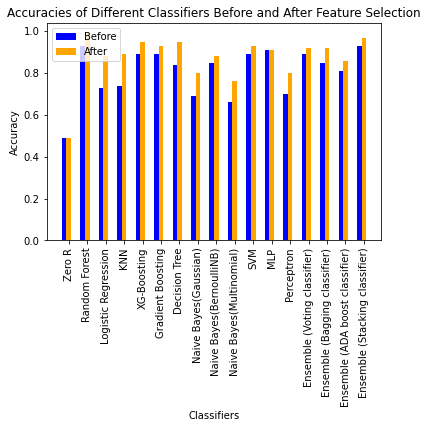

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the accuracies stored in dictionaries
classifiers = ['Zero R', 'Random Forest', 'Logistic Regression','KNN', 'XG-Boosting', 'Gradient Boosting','Decision Tree', 'Naive Bayes(Gaussian)', 'Naive Bayes(BernoulliNB)','Naive Bayes(Multinomial)','SVM','MLP','Perceptron','Ensemble (Voting classifier)','Ensemble (Bagging classifier)','Ensemble (ADA boost classifier)','Ensemble (Stacking classifier)']
accuracies_before = {'Zero R': 0.49, 'Random Forest': 0.93, 'Logistic Regression': 0.73,'KNN':0.74,'XG-Boosting': 0.89, 'Gradient Boosting':0.89,'Decision Tree':0.84, 'Naive Bayes(Gaussian)':0.69, 'Naive Bayes(BernoulliNB)':0.85,'Naive Bayes(Multinomial)':0.66,'SVM':0.89,'MLP':0.91,'Perceptron':0.70,'Ensemble (Voting classifier)':0.89,'Ensemble (Bagging classifier)':0.85,'Ensemble (ADA boost classifier)':0.81,'Ensemble (Stacking classifier)':0.93}
accuracies_after = {'Zero R': 0.49, 'Random Forest': 0.99, 'Logistic Regression': 0.88,'KNN':0.89,'XG-Boosting': 0.95, 'Gradient Boosting':0.93,'Decision Tree':0.95, 'Naive Bayes(Gaussian)':0.80, 'Naive Bayes(BernoulliNB)':0.88,'Naive Bayes(Multinomial)':0.76,'SVM':0.93,'MLP':0.91,'Perceptron':0.80,'Ensemble (Voting classifier)':0.92,'Ensemble (Bagging classifier)':0.92,'Ensemble (ADA boost classifier)':0.86,'Ensemble (Stacking classifier)':0.97}
# Create a list of x-axis values (e.g., classifier names)
x_values = np.arange(len(classifiers))

# Set the width of the bars
bar_width = 0.25

# Plot the accuracies
plt.bar(x_values, list(accuracies_before.values()), width=bar_width, tick_label=classifiers, label='Before', color='blue')
plt.bar(x_values + bar_width, list(accuracies_after.values()), width=bar_width, tick_label=classifiers, label='After', color='orange')

# Add labels and title to the plot
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracies of Different Classifiers Before and After Feature Selection')
plt.xticks(rotation=90)
# Add a legend
plt.legend()

# Show the plot
plt.show()